<a href="https://www.kaggle.com/code/mirzanasrullah/loan-default-eda-and-pridiction?scriptVersionId=277824075" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-dataset/Loan_Default.csv


# **1. Introduction**

## **About the Author 👤**
Nasrullah Asghar

[LinkedIn](https://www.linkedin.com/in/inasrullah-asghar)

![](https://raw.githubusercontent.com/Masterx-AI/Project_Loan_Default_Risk_Expectancy_/main/loan.jpg)

## **About the Data**

### 💰 Once Upon a Loan — Meet the Data Behind Defaults

Every great story starts with an interesting cast — and ours begins with *borrowers*, *lenders*, and a mysterious column called **'Status'**.  

In the world of finance, not everyone keeps their promise to repay. Some do, some don’t — and our mission is to find out **why**.  

Before we jump into detective mode 🕵️‍♂️, let’s first *meet our dataset* and see what kind of clues it holds.


### Meta Data

**`Description:`**\
Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc. The dataset is subject to strong multicollinearity & empty values. Can you overcome these factors & build a strong classifier to predict defaulters?

**`Acknowledgements:`**\
This dataset has been referred from [Kaggle](https://www.kaggle.com/datasets/yasserh/loan-default-dataset/data).

**`Objective:`**
- Understand the Dataset & cleanup (if required).
- Build classification model to predict weather the loan borrower will default or not.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

### Import Pyhton Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Load the Data Set

In [3]:
df = pd.read_csv("/kaggle/input/loan-default-dataset/Loan_Default.csv")

### First Five Rows of Data

In [4]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


### 📘 Dataset Dictionary

| Column Name | Explanation |
|--------------|-------------|
| `ID` | Unique identifier for each loan record. |
| `year` | The year when the loan application was processed (2019 for all records). |
| `loan_limit` | Indicates whether the loan amount exceeded conforming loan limits (e.g., 'cf', 'ncf'). |
| `Gender` | Gender of the primary applicant (Male/Female). |
| `approv_in_adv` | Specifies whether the loan was approved in advance (‘pre-approved’ or ‘not pre-approved’). |
| `loan_type` | Type of loan applied for (e.g., Conventional, FHA, VA). |
| `loan_purpose` | The reason for the loan (e.g., Home purchase, Refinancing, Improvement). |
| `Credit_Worthiness` | Indicates applicant’s credit rating (e.g., Good, Poor). |
| `open_credit` | Describes whether the applicant has open lines of credit. |
| `business_or_commercial` | States if the loan is for business/commercial purposes or personal use. |
| `loan_amount` | The total amount of money requested for the loan. |
| `rate_of_interest` | Interest rate charged on the loan. |
| `Interest_rate_spread` | Difference between the loan’s interest rate and the average market rate. |
| `Upfront_charges` | Fees or charges paid upfront during loan origination. |
| `term` | Duration (in months) for which the loan is granted (e.g., 360 months = 30 years). |
| `Neg_ammortization` | Indicates if the loan allows negative amortization (interest added to the principal). |
| `interest_only` | Whether the loan has an interest-only payment period. |
| `lump_sum_payment` | Specifies if the borrower can make lump-sum payments. |
| `property_value` | Appraised market value of the property securing the loan. |
| `construction_type` | Type of construction (e.g., site-built, manufactured). |
| `occupancy_type` | Specifies if the property will be owner-occupied, rented, or vacant. |
| `Secured_by` | What secures the loan (e.g., Property, Land). |
| `total_units` | Number of housing units covered by the property (e.g., 1, 2, 3, or 4 units). |
| `income` | Applicant’s annual income. |
| `credit_type` | Type of credit instrument used (e.g., Conventional, Revolving). |
| `Credit_Score` | Applicant’s credit score (typically ranges between 500–900). |
| `co-applicant_credit_type` | Type of credit for co-applicant, if any. |
| `age` | Age group or bracket of the applicant. |
| `submission_of_application` | Indicates whether the loan application was submitted directly or via an agent. |
| `LTV` | Loan-to-Value ratio — shows the loan amount as a percentage of property value. |
| `Region` | Geographic region where the loan was issued. |
| `Security_Type` | Indicates type of security backing the loan (e.g., secured or unsecured). |
| `Status` | **Target variable** — loan status: `1` = defaulted, `0` = non-defaulted. |
| `dtir1` | Debt-to-Income Ratio — measures how much of the applicant’s income goes toward debt payments. |


### Shape of the Data

In [5]:
print(f"The data set has {df.shape[0]} rows and {df.shape[1]} columns.")

The data set has 148670 rows and 34 columns.


### Info of the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Descriptive Statistics

In [7]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


### Missing Values

In [8]:
# Number of Missing Values
df.isnull().sum().sort_values(ascending=False)

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
property_value               15098
LTV                          15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
age                            200
submission_of_application      200
loan_purpose                   134
Neg_ammortization              121
term                            41
year                             0
ID                               0
business_or_commercial           0
open_credit                      0
lump_sum_payment                 0
interest_only                    0
loan_amount                      0
Gender                           0
loan_type                        0
Credit_Worthiness                0
occupancy_type                   0
construction_type                0
Credit_Score                     0
credit_type                      0
total_units         

In [9]:
# Percentage of Missing Values
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Upfront_charges              26.664425
Interest_rate_spread         24.644515
rate_of_interest             24.509989
dtir1                        16.224524
property_value               10.155378
LTV                          10.155378
income                        6.154571
loan_limit                    2.249277
approv_in_adv                 0.610749
age                           0.134526
submission_of_application     0.134526
loan_purpose                  0.090133
Neg_ammortization             0.081388
term                          0.027578
year                          0.000000
ID                            0.000000
business_or_commercial        0.000000
open_credit                   0.000000
lump_sum_payment              0.000000
interest_only                 0.000000
loan_amount                   0.000000
Gender                        0.000000
loan_type                     0.000000
Credit_Worthiness             0.000000
occupancy_type                0.000000
construction_type        

### 🔍 Observations

- The dataset contains **148,670 rows** and **34 columns**, making it quite comprehensive for loan analysis.  
- It includes both **numerical (13)** and **categorical (21)** features covering aspects like loan amount, property value, income, credit score, and applicant information.  
- The **target variable** is `Status`, which indicates whether a loan has defaulted (1) or not (0).  
- Major missing values are present in financial-related columns such as:  
  - `Upfront_charges` (~26.7%)  
  - `Interest_rate_spread` (~24.6%)  
  - `rate_of_interest` (~24.5%)  
  - `dtir1` (~16.2%)  
  - `LTV` and `property_value` (~10.1%)  
  - `income` (~6.1%)  
- Minor missing values appear in categorical fields like `loan_limit`, `approv_in_adv`, `submission_of_application`, and `age`.  
- Overall, **missingness is focused on financial attributes**, which could affect credit risk modeling if not handled properly.  
- The dataset is rich and detailed — offering great potential for uncovering **patterns in borrower behavior** and **predicting loan default risk**.

🪄 *Next, we’ll move to Step 2 — “Clues from the Data Crime Scene,” where we’ll visualize and explore the patterns hidden in these features!*


# **2. Exploratory Data Analysis (EDA)**

### 🕵️‍♂️ Step 2: Clues from the Data Crime Scene — Exploratory Data Analysis (EDA)

Welcome to the **data detective zone**! 🔎  
Every column in our dataset hides a clue — about who defaults, who repays on time, and why.  
Before jumping to modeling, we’ll visualize patterns, spot anomalies, and explore the relationships between features.  

We’ll break down our investigation into three parts:

1. **Univariate Exploration** — Examine each feature individually (distributions, outliers, etc.)  
2. **Bivariate Exploration** — Compare features with the target variable `Status` to find what drives loan defaults.  
3. **Multivariate Insights** — Understand how multiple factors combine to affect risk.

Let’s start with **Univariate Analysis** — the individual suspects of our data story!


## **🎯 Step 2.1: Univariate Analysis — Meet the Main Characters**

Before solving our loan-default mystery, let’s get to know our key players (features).  
Who are they? How do they behave? Any unusual suspects?

We’ll start by exploring **numeric** and **categorical** features individually  
to uncover patterns, distributions, and possible outliers.


In [10]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [11]:
len(numeric_cols) + len(categorical_cols)

34

### Numeric Columns

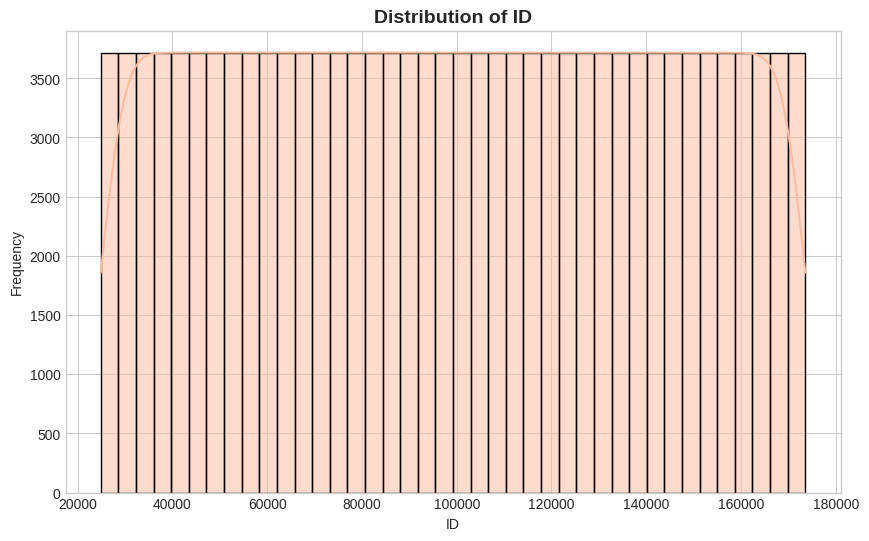

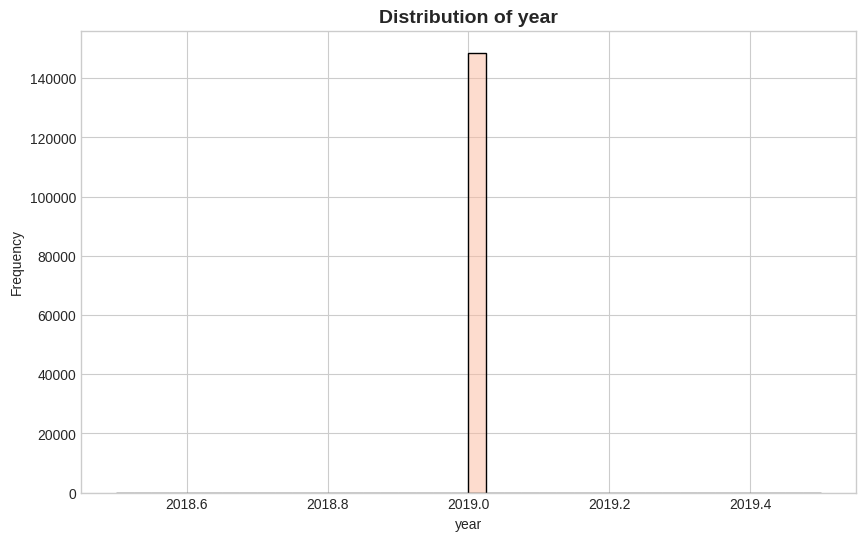

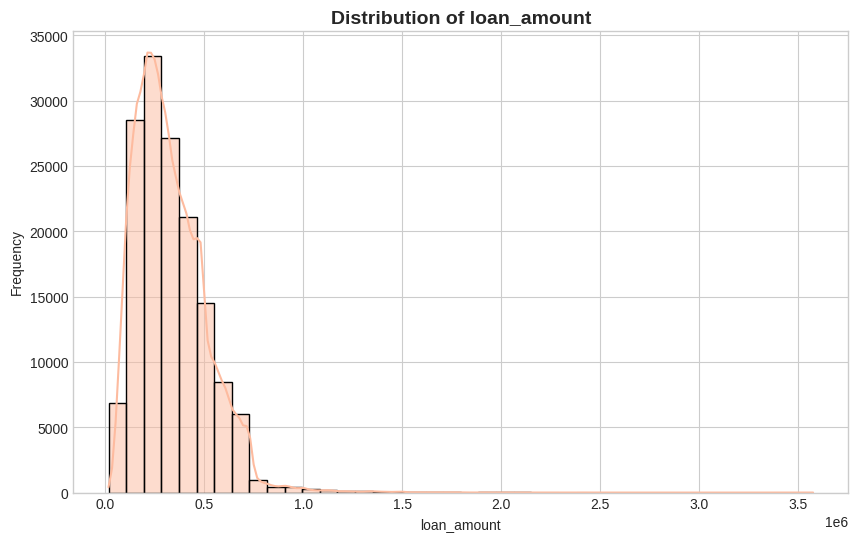

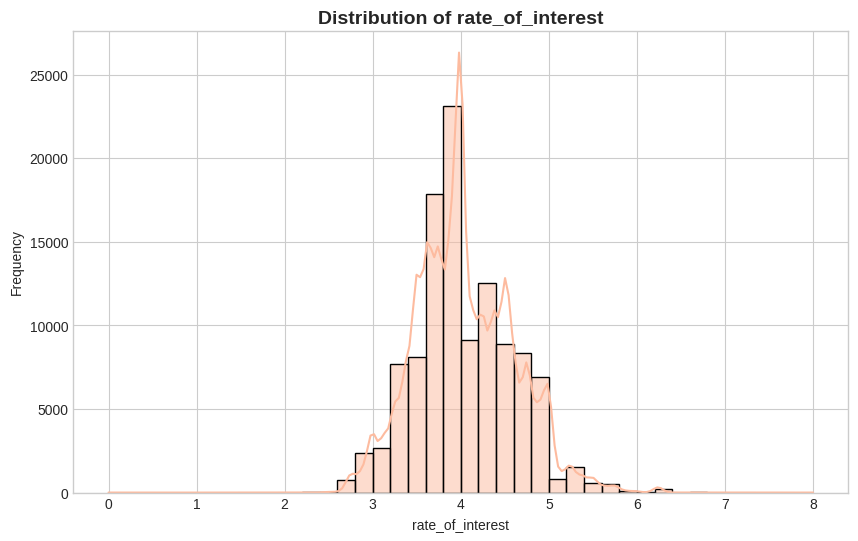

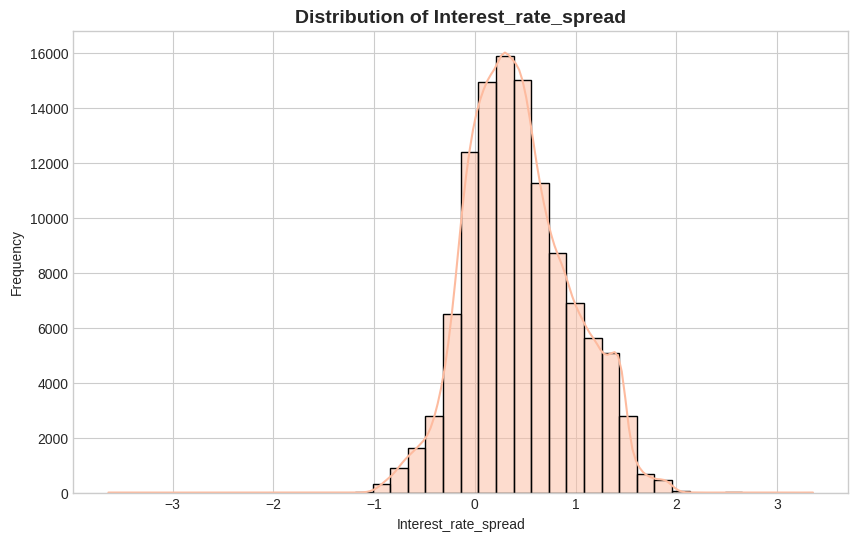

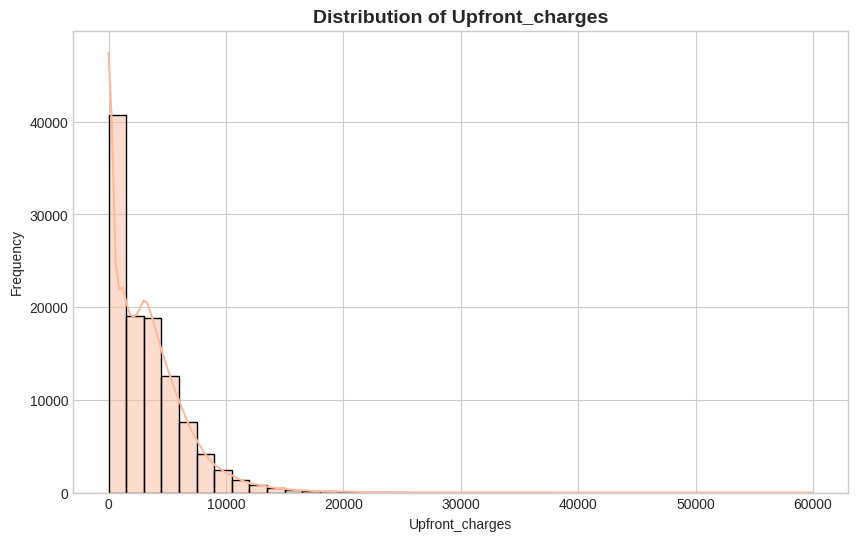

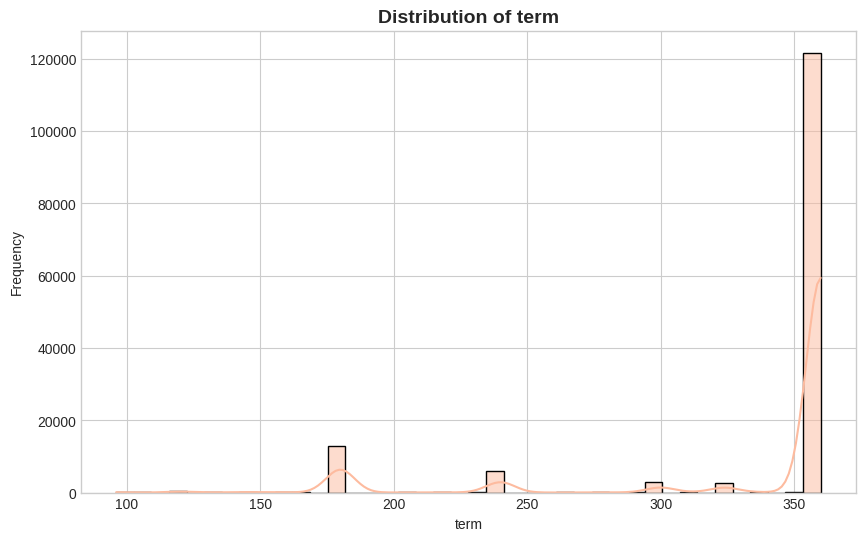

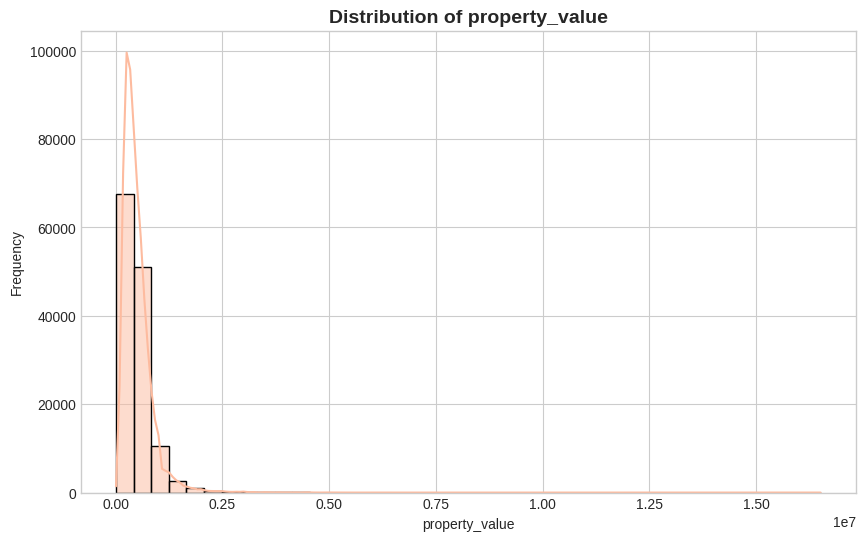

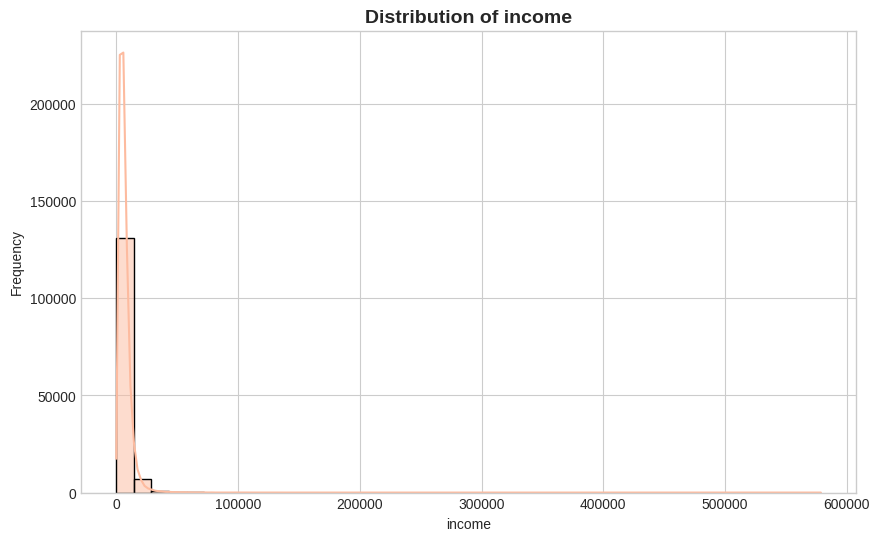

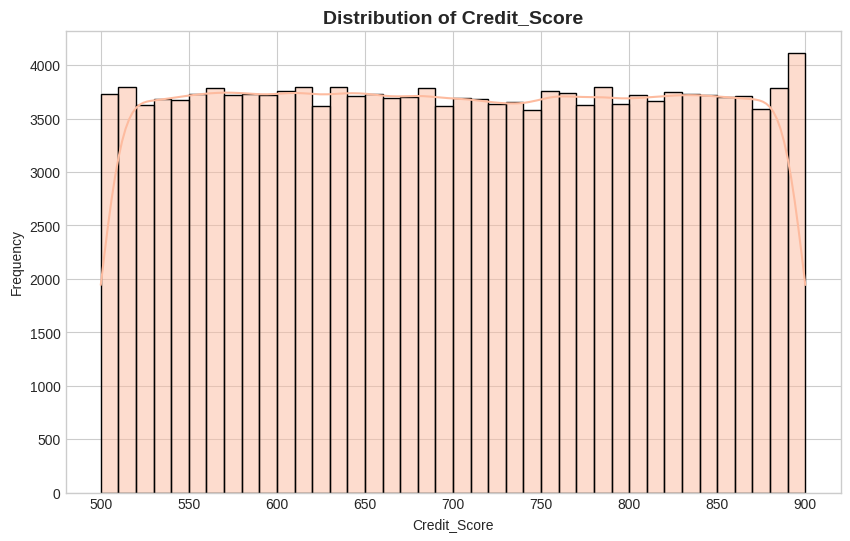

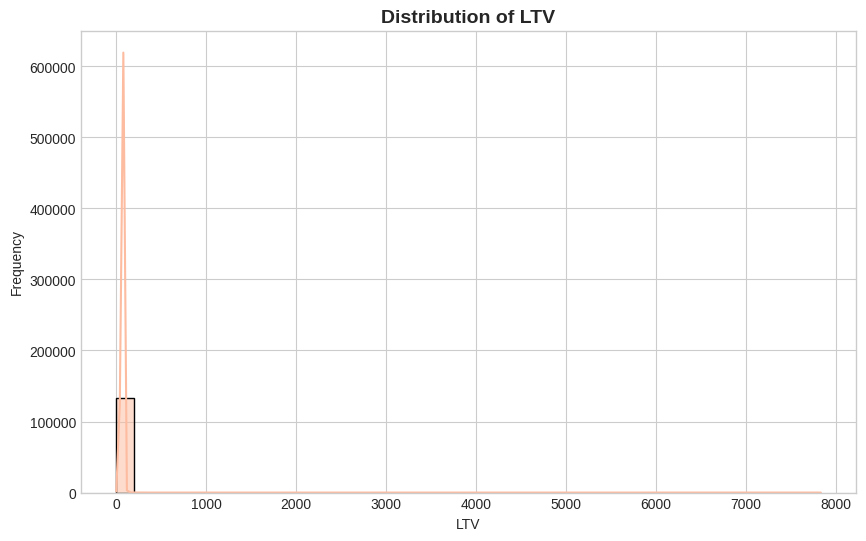

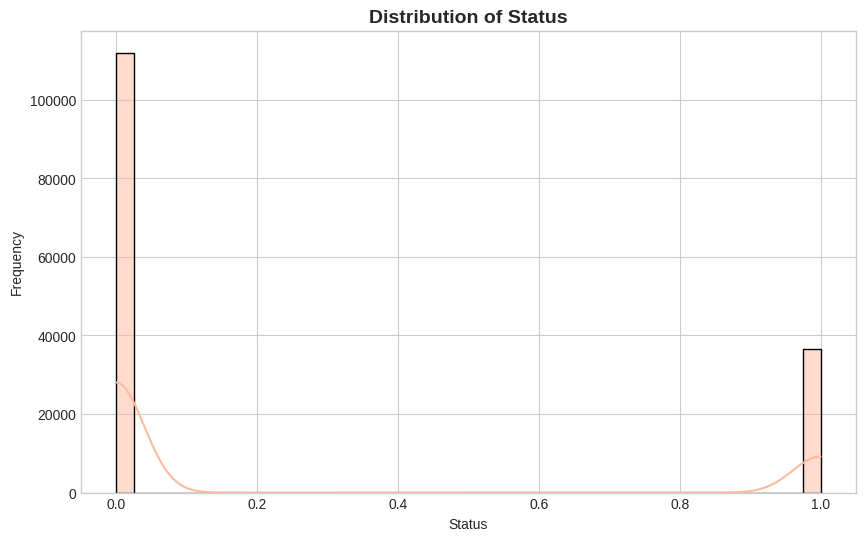

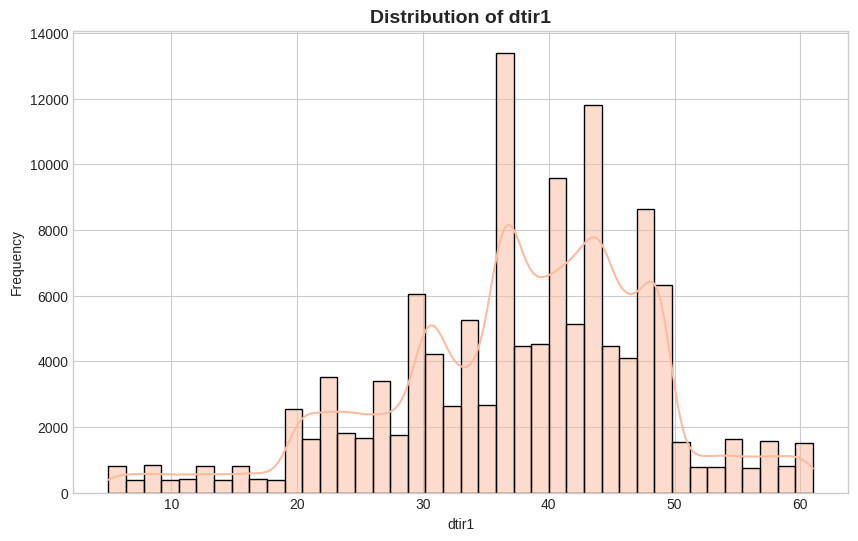

In [12]:
plt.style.use('seaborn-v0_8-whitegrid')
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=40, color='#FDBB9F')  
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [13]:
# Calculate and print skewness for each numeric column
for col in numeric_cols:
    skewness = df[col].skew()
    print(f"The Skewness of {col} is {skewness:.2f}")

The Skewness of ID is 0.00
The Skewness of year is 0.00
The Skewness of loan_amount is 1.67
The Skewness of rate_of_interest is 0.39
The Skewness of Interest_rate_spread is 0.28
The Skewness of Upfront_charges is 1.75
The Skewness of term is -2.17
The Skewness of property_value is 4.59
The Skewness of income is 17.31
The Skewness of Credit_Score is 0.00
The Skewness of LTV is 120.62
The Skewness of Status is 1.18
The Skewness of dtir1 is -0.55


### 📈 Skewness Analysis — Detecting Data Imbalance in Disguise

Before we move deeper, let’s check how “balanced” or “tilted” our numeric features are.  
Skewness helps us understand whether most data points lie on one side of the mean.  
A skewness of **0** means symmetry, while values above **1** or below **–1** indicate strong skew.

| Feature | Skewness | Interpretation |
|----------|-----------|----------------|
| `ID` | 0.00 | Uniformly distributed — purely an identifier. |
| `year` | 0.00 | Constant across all entries (only 2019). |
| `loan_amount` | 1.67 | **Right-skewed** — many small loans, few very large ones. |
| `rate_of_interest` | 0.39 | Slightly **right-skewed** — mostly centered near average rates. |
| `Interest_rate_spread` | 0.28 | Fairly **symmetric**, minimal distortion. |
| `Upfront_charges` | 1.75 | **Highly right-skewed** — most borrowers pay small fees, some pay huge amounts. |
| `term` | -2.17 | **Left-skewed** — most loans are long-term, few are short-term. |
| `property_value` | 4.59 | **Extremely right-skewed** — a few high-value properties stretch the scale. |
| `income` | 17.31 | **Severely right-skewed** — large income disparity among borrowers. |
| `Credit_Score` | 0.00 | **Balanced** — most borrowers have mid-range scores. |
| `LTV` | 120.62 | **Extremely right-skewed** — possibly contains outliers or errors. |
| `Status` | 1.18 | **Right-skewed** — far fewer defaults than successful loans. |
| `dtir1` | -0.55 | Slight **left skew**, fairly stable distribution. |

---

### 🧩 Observations

- Most **financial variables** (`loan_amount`, `income`, `Upfront_charges`, `property_value`, `LTV`) show **strong right skewness**, indicating a few extreme high-value cases.  
- **LTV** and **income** have *very high skewness* — they may need **log transformation** to stabilize model performance later.  
- **Term** and **dtir1** are slightly **left-skewed**, meaning most loans have longer durations and moderate debt ratios.  
- **Rate-related features** (`rate_of_interest`, `Interest_rate_spread`) are nicely balanced — good signs for numerical stability.  
- The **target `Status`** is slightly right-skewed, confirming **class imbalance** (more non-defaults than defaults).  

💡 *Insight:*  
Our data leans heavily on the right side — just like income distribution in real life!  
We’ll handle this skewness in preprocessing to prevent models from getting biased toward common low-value ranges.


### Categorical Columns

In [14]:
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())
    print('-' * 60)



Value counts for 'loan_limit':
loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64
------------------------------------------------------------

Value counts for 'Gender':
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
------------------------------------------------------------

Value counts for 'approv_in_adv':
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64
------------------------------------------------------------

Value counts for 'loan_type':
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
------------------------------------------------------------

Value counts for 'loan_purpose':
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64
------------------------------------------------------------

Value counts for 'Credit_Worthiness':
Credit_Worthiness
l1    142344
l2      6326
Nam

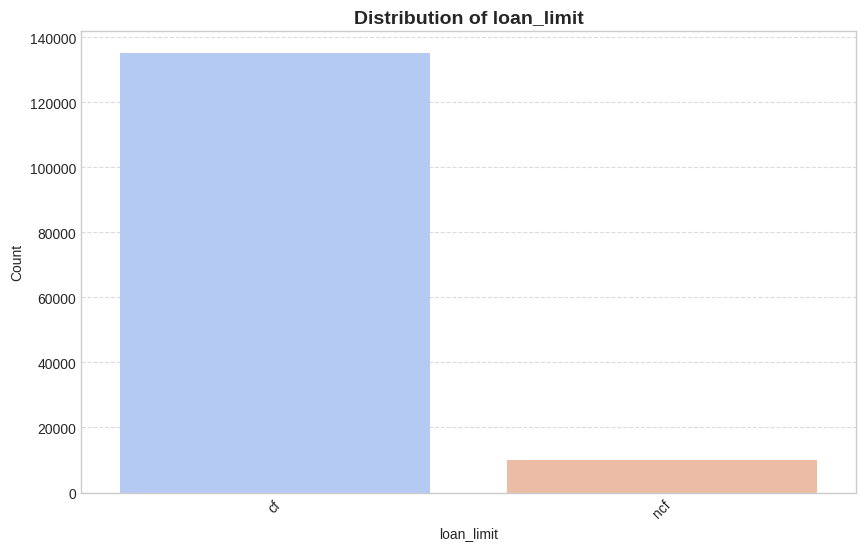

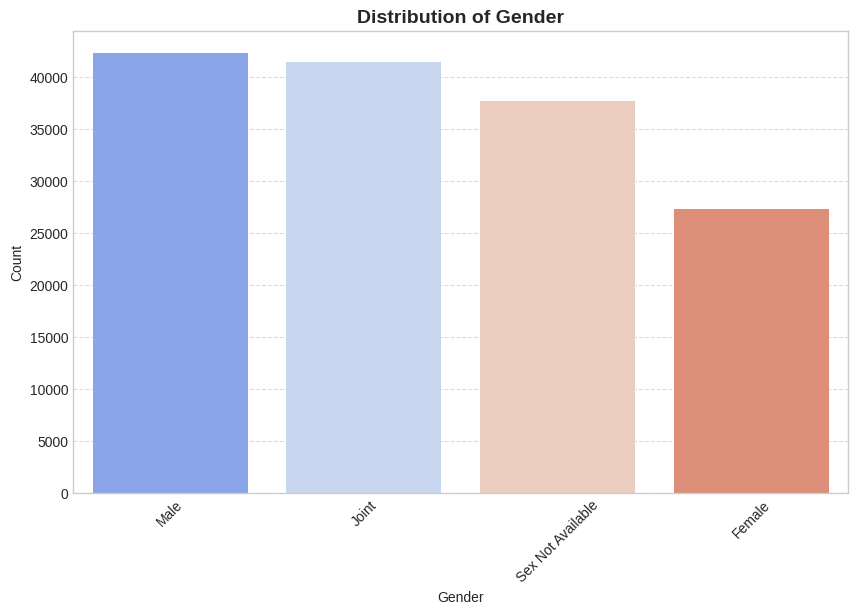

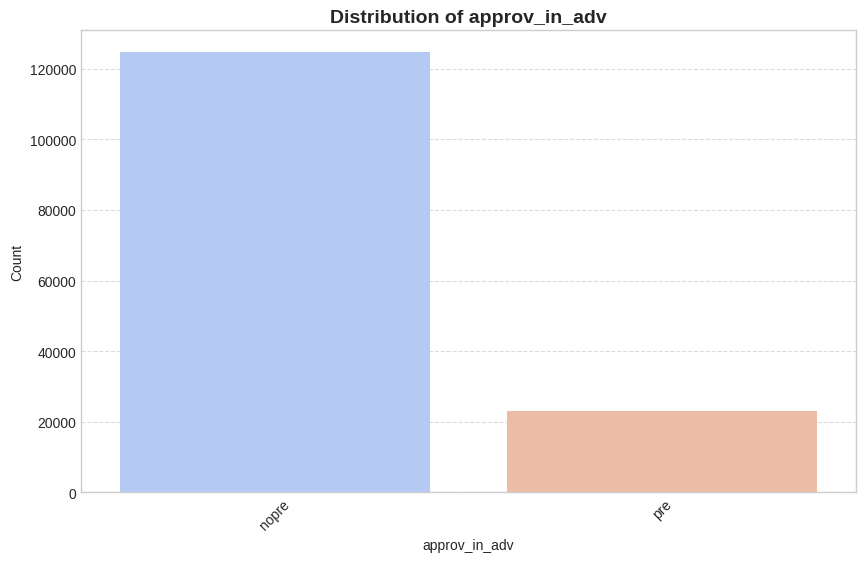

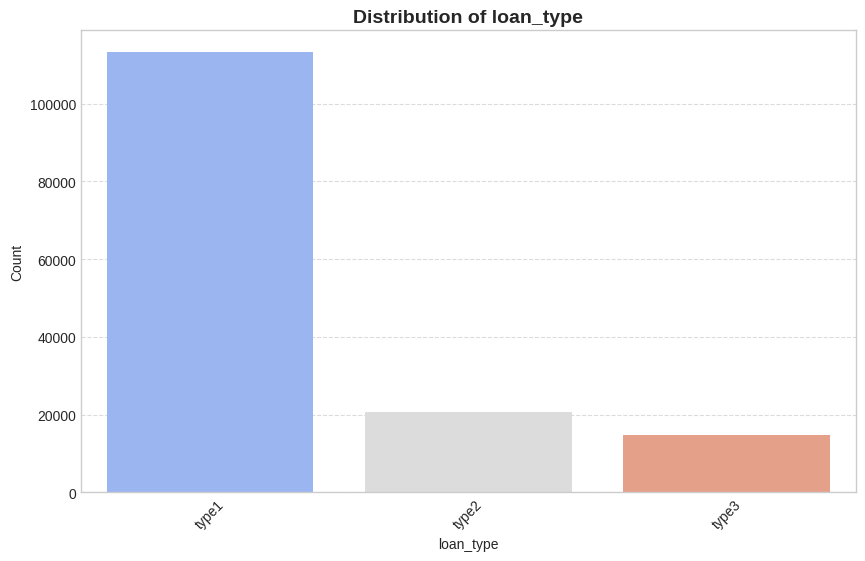

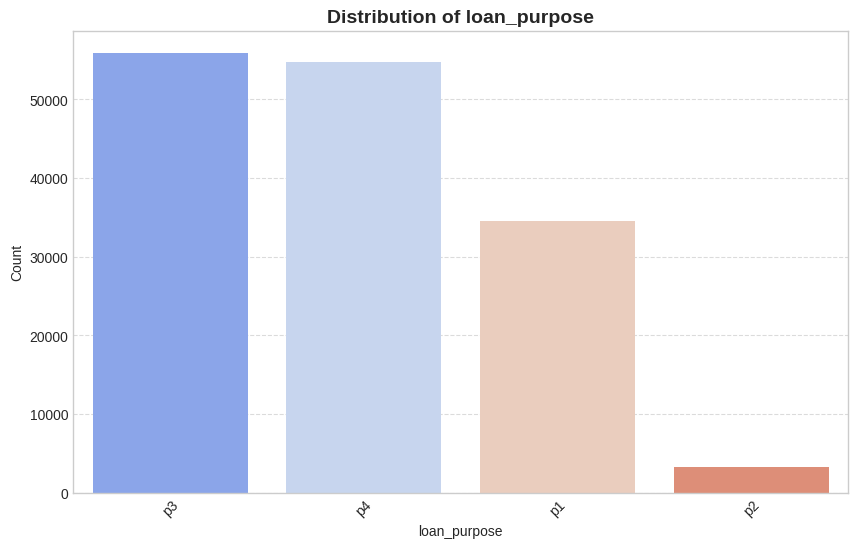

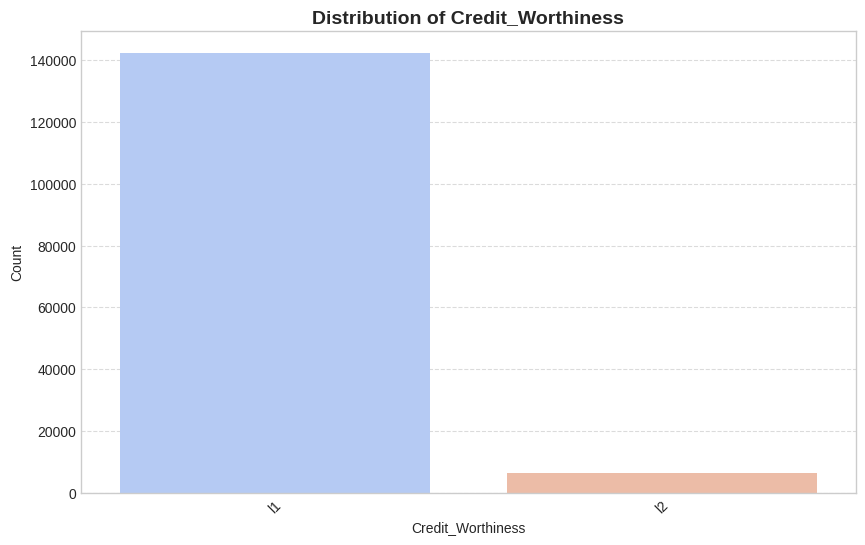

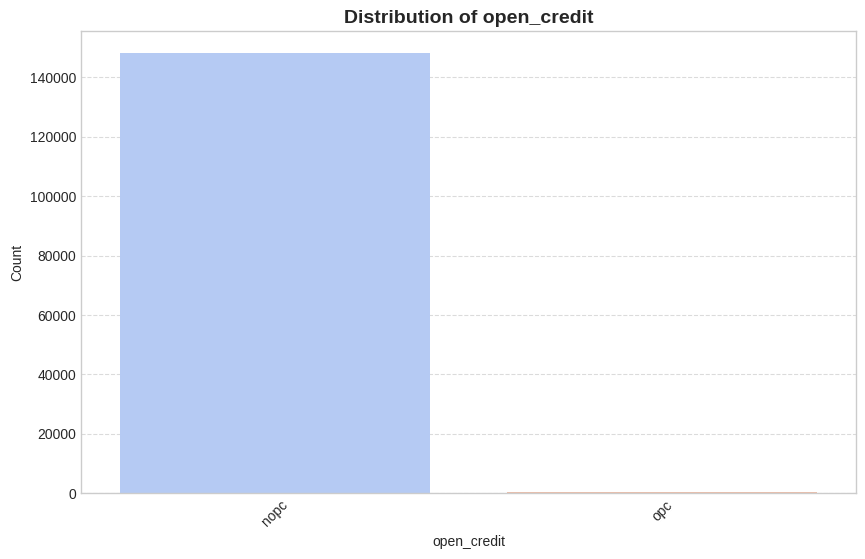

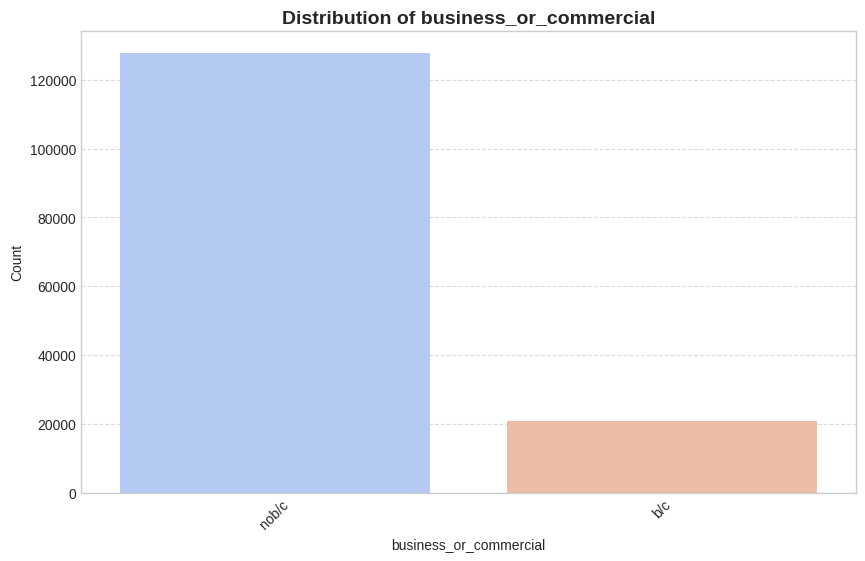

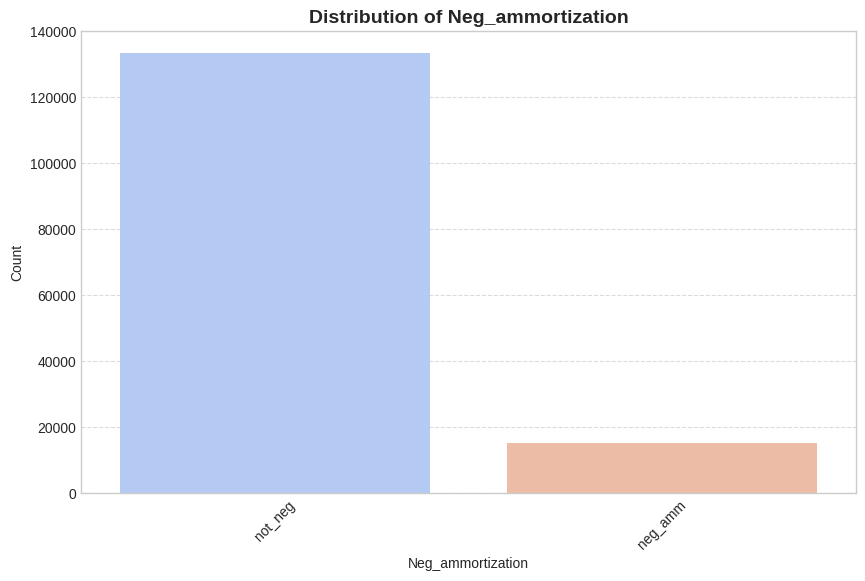

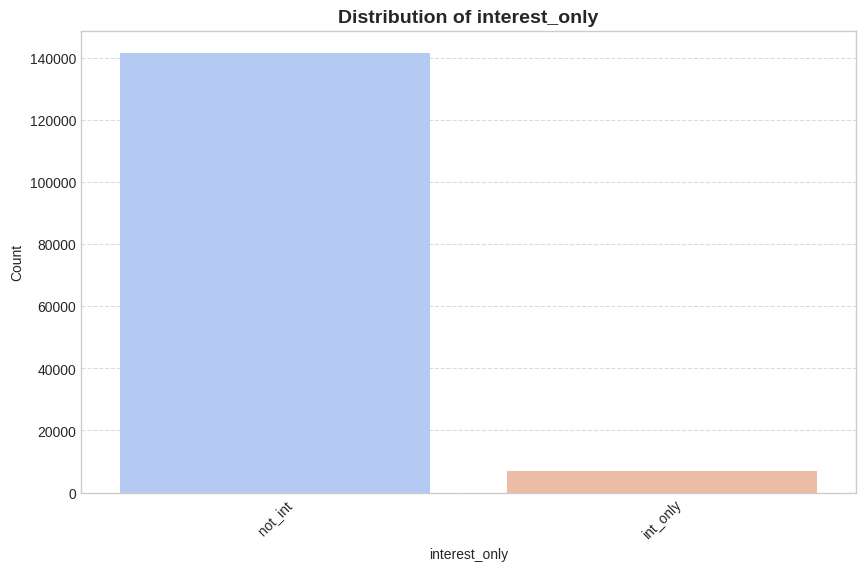

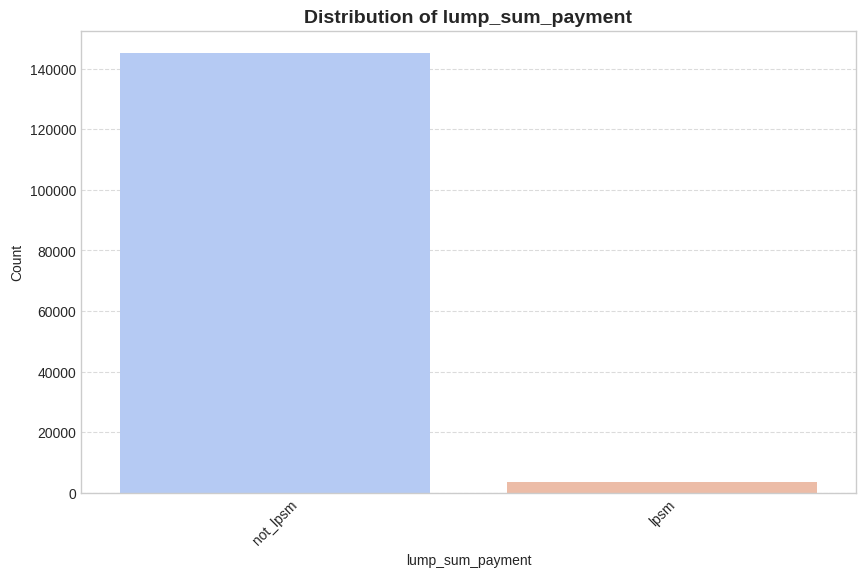

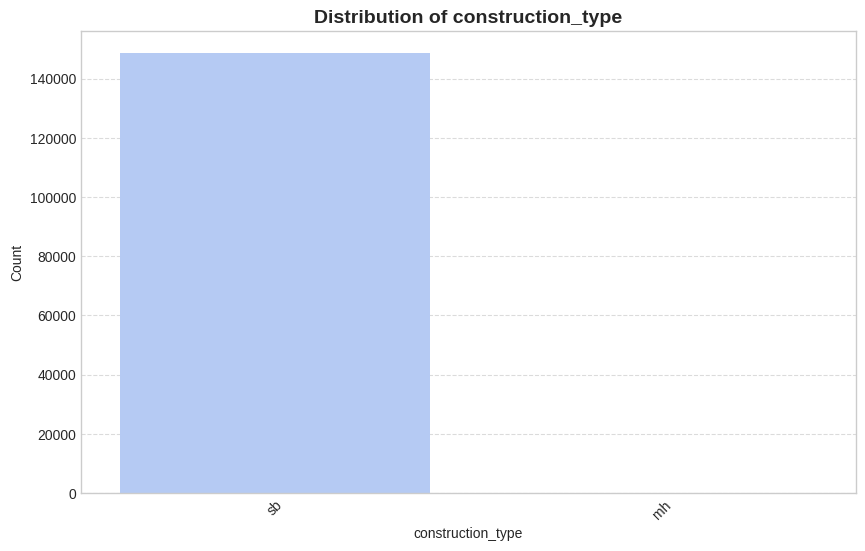

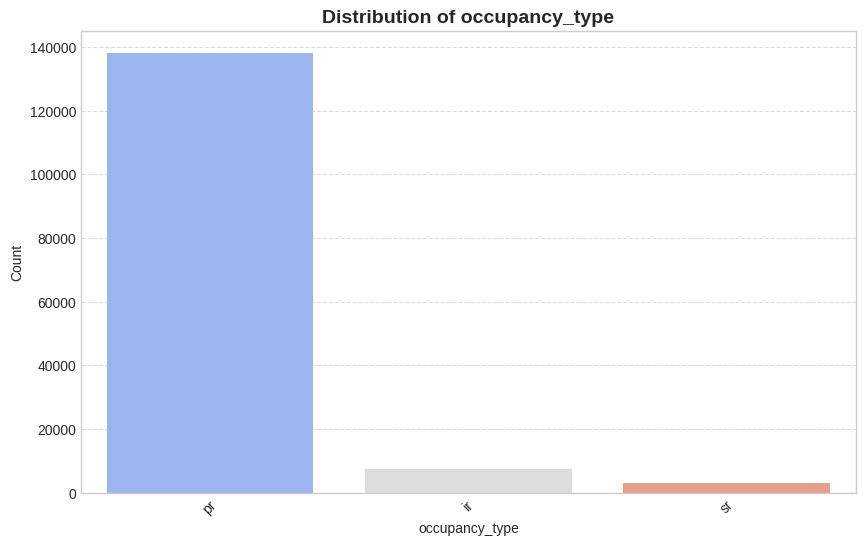

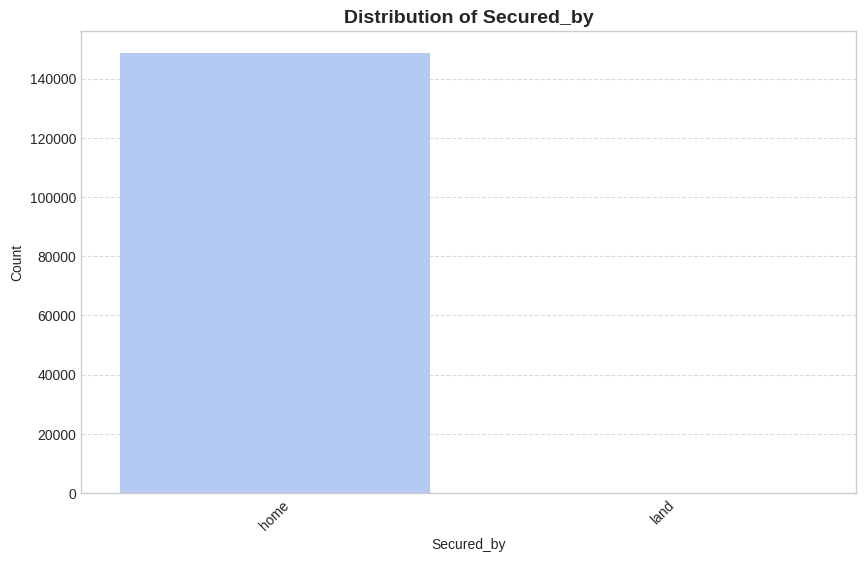

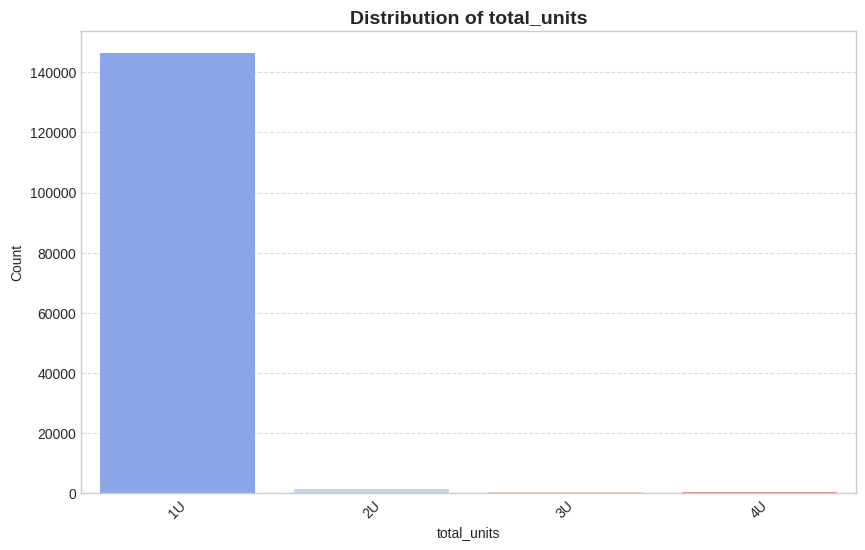

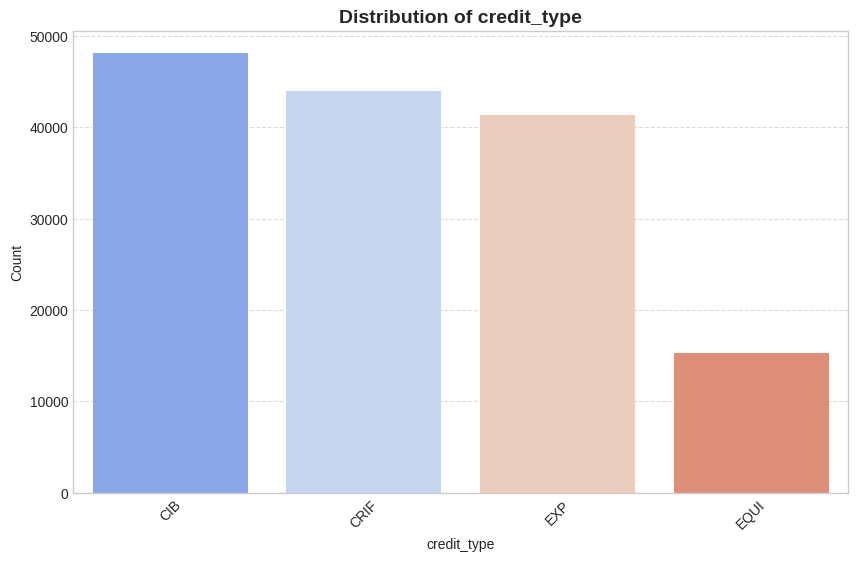

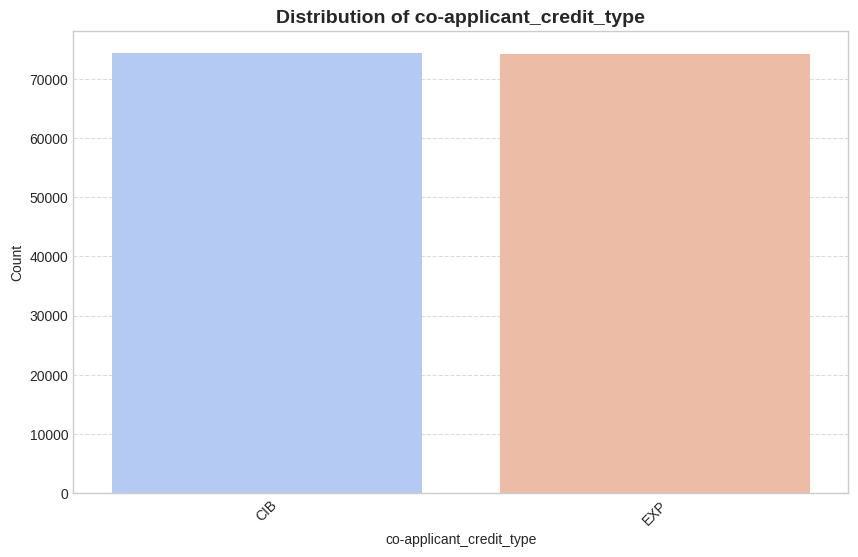

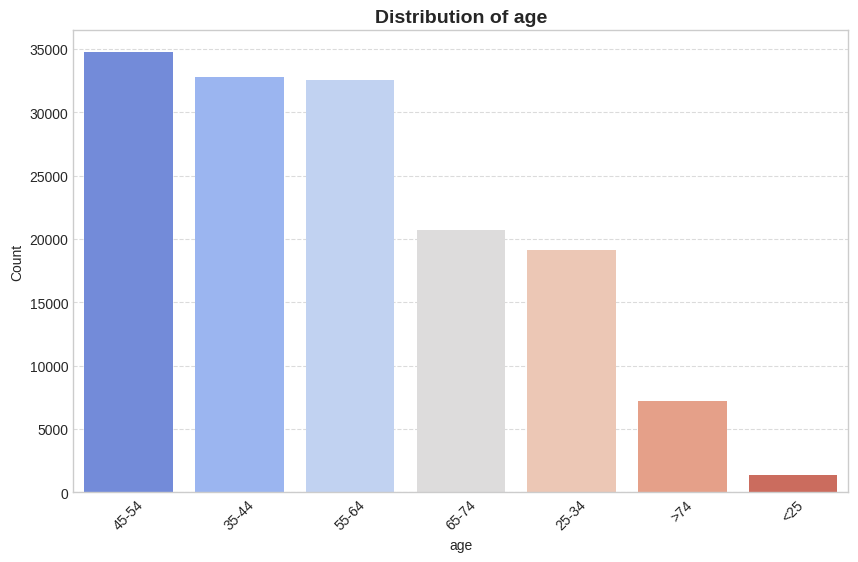

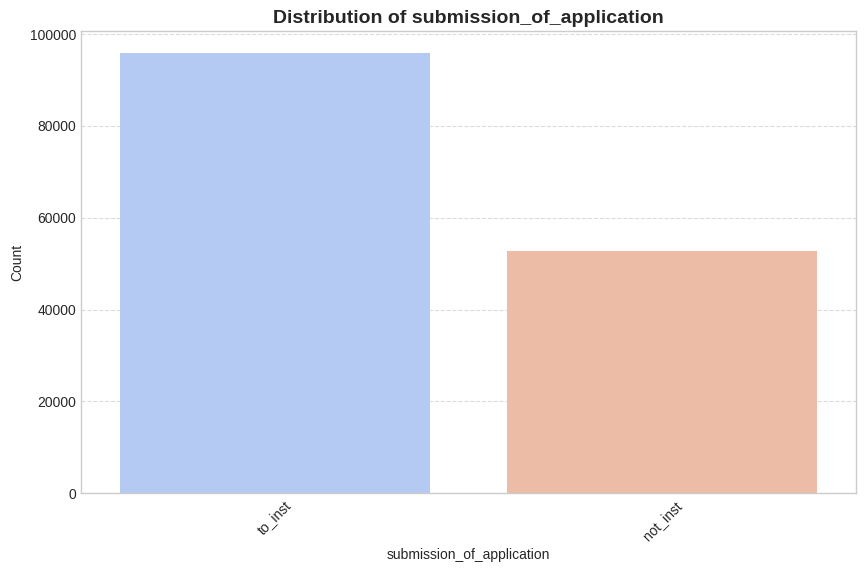

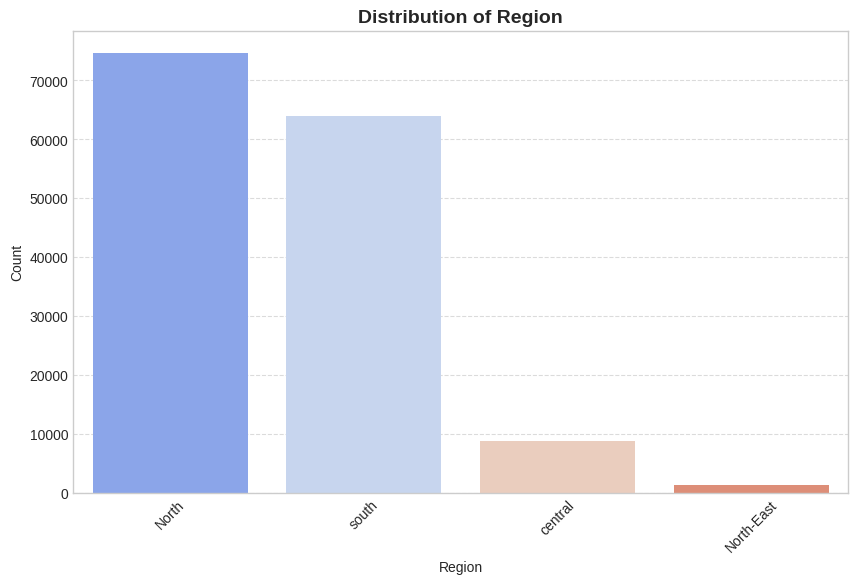

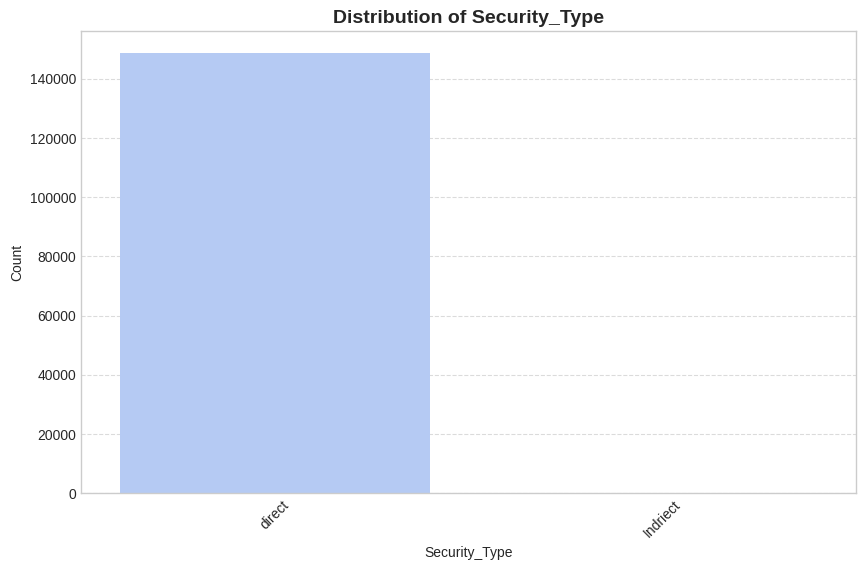

In [15]:
#  Count Plots for Categorical Features
plt.style.use('seaborn-v0_8-whitegrid')

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    order = df[col].value_counts().index[:10]
    sns.countplot(x=df[col],order=order, palette='coolwarm')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


### 🧩 Categorical Feature Observations

- **loan_limit**: Most loans fall under cf (Conforming), showing that standardized loan types dominate.
- **Gender**: Majority are Male and Joint applicants; Sex Not Available appears quite frequently (possible missing or anonymized data).
- **approv_in_adv**: Most applications are not pre-approved.
- **loan_type**: Type1 loans are most common, followed by Type2 and Type3.
- **loan_purpose**: Purposes p3 and p4 dominate over p1 and p2.
- **Credit_Worthiness**: Majority are l1 (good credit).
- **open_credit**: Almost all have no open credit (class imbalance).
- **business_or_commercial**: Most loans are not business/commercial related.
- **Neg_ammortization**: not_neg category dominates (rarely used negative amortization).
- **interest_only**: not_int (no interest-only loans) are the majority.
- **lump_sum_payment**: not_lpsm (no lump sum payments) dominate.
- **construction_type**: Mostly site-built (sb) homes.
- **occupancy_type**: Majority are primary residence (pr).
- **Secured_by**: Nearly all loans are secured by home.
- **total_units**: Mostly 1-unit properties.
- **credit_type**: CIB and CRIF are top credit sources.
- **co-applicant_credit_type**: Even split between CIB and EXP.
- **age**: Most applicants are in the 45–54 age group; very few under 25.
- **submission_of_application**: Majority submitted to the institution directly.
- **Region**: North and South regions dominate applications.
- **Security_Type**: Almost all are direct security type.

## 🎯 Step 2.2: Bivariate Analysis — Connecting the Dots

Now that we’ve met our dataset’s main characters, it’s time to see how they interact! 💬
Do certain patterns in income, credit score, or loan purpose lead to loan approval or rejection?
Are there relationships hiding beneath the surface that could explain financial behaviors?

In this step, we’ll explore how two variables relate —
focusing especially on numeric vs target and categorical vs target relationships
to uncover meaningful insights and hidden dependencies.

In [16]:
for i in numeric_cols:
    grouped_data = df.groupby('Status')[i].describe()
    print(f"Summary for {i}:")
    print(grouped_data)
    print("-" * 80)

Summary for ID:
           count          mean           std      min      25%      50%  \
Status                                                                    
0       112031.0  99182.699530  42925.111042  24892.0  61964.5  99222.0   
1        36639.0  99352.313218  42894.457217  24890.0  62304.0  99233.0   

             75%       max  
Status                      
0       136306.0  173559.0  
1       136669.0  173553.0  
--------------------------------------------------------------------------------
Summary for year:
           count    mean  std     min     25%     50%     75%     max
Status                                                               
0       112031.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0
1        36639.0  2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0
--------------------------------------------------------------------------------
Summary for loan_amount:
           count           mean            std      min       25%       50%  \
Sta

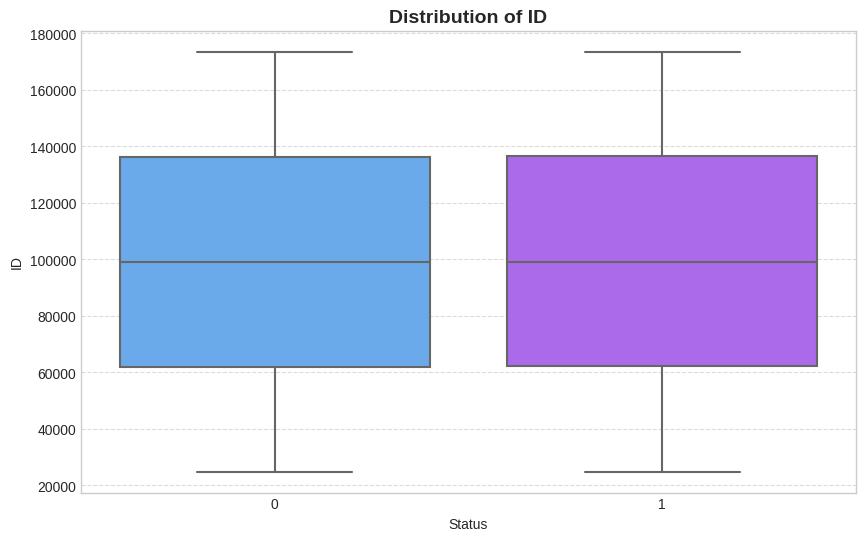

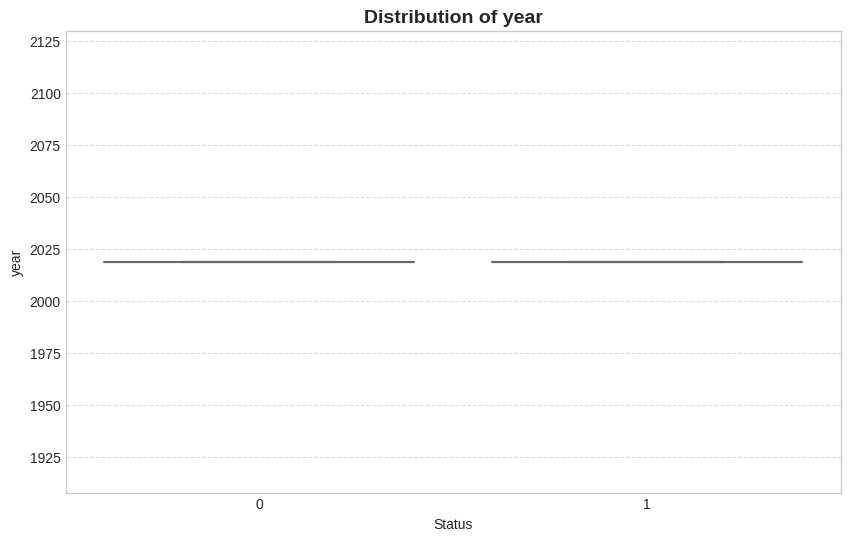

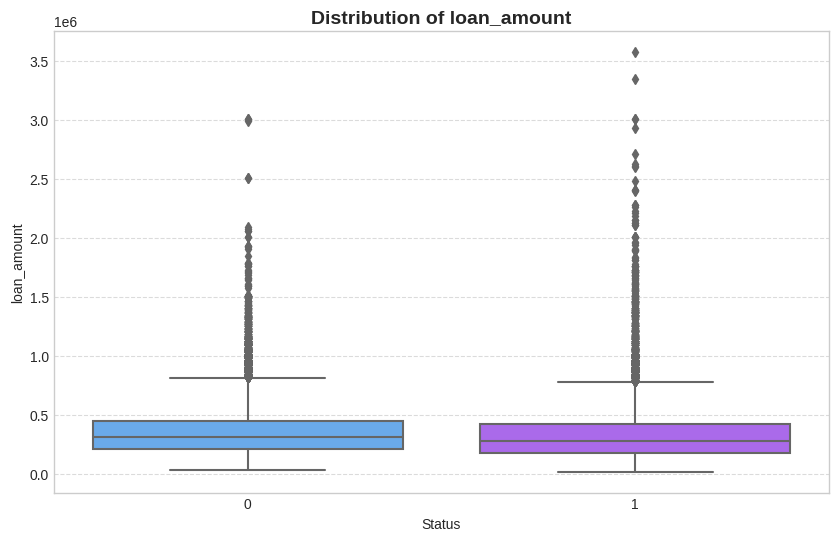

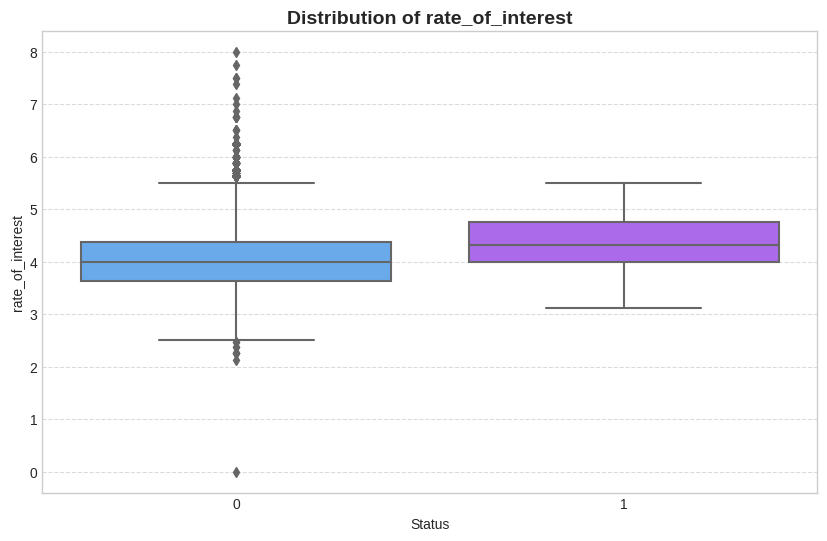

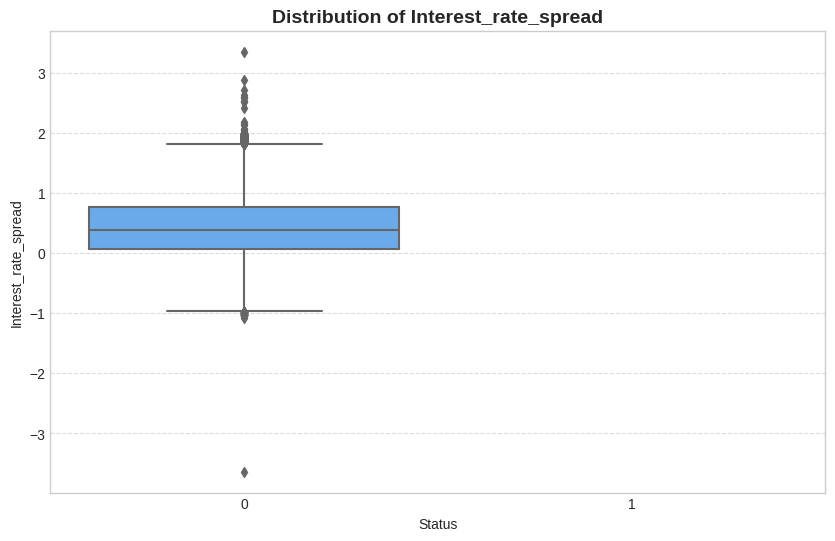

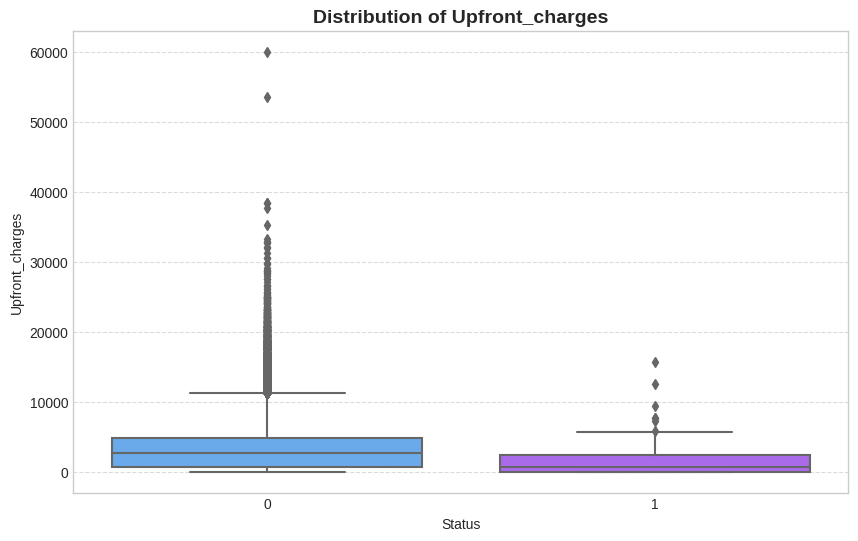

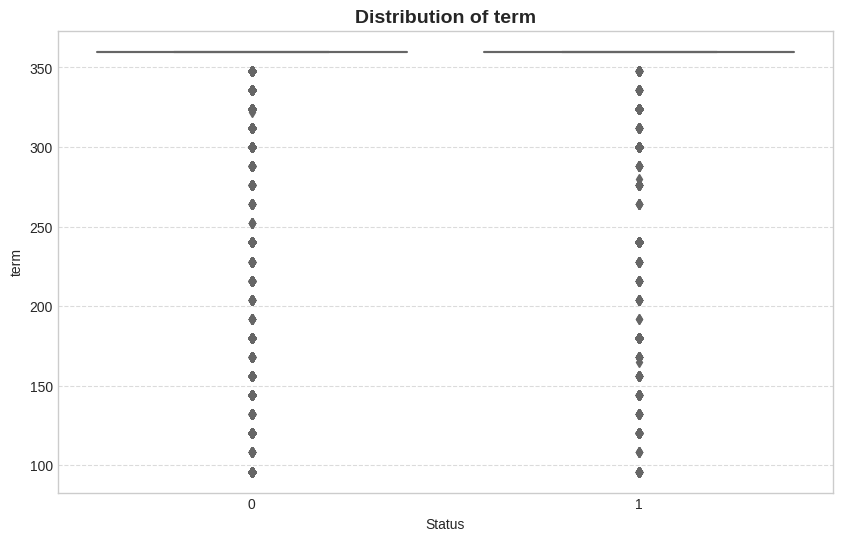

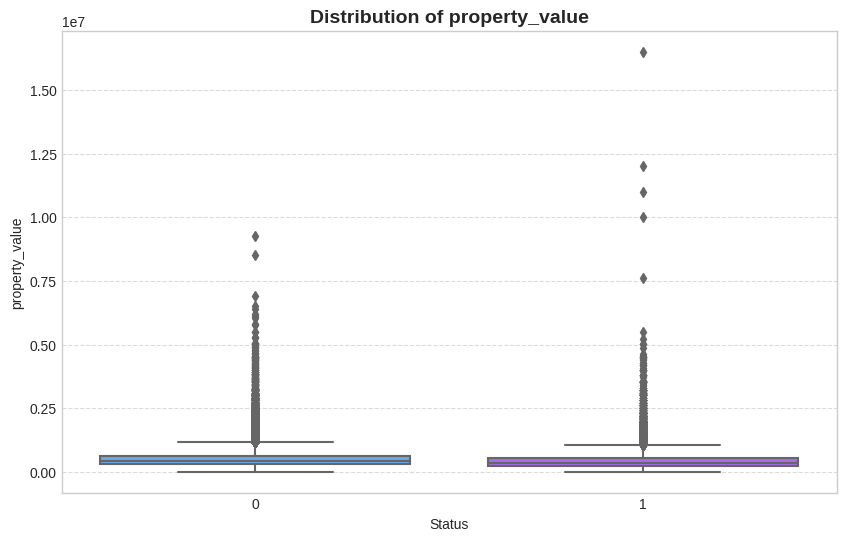

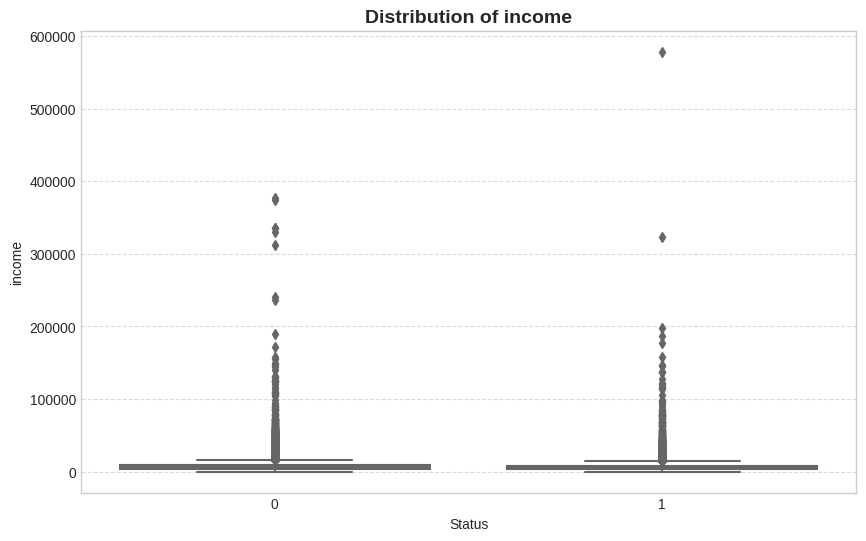

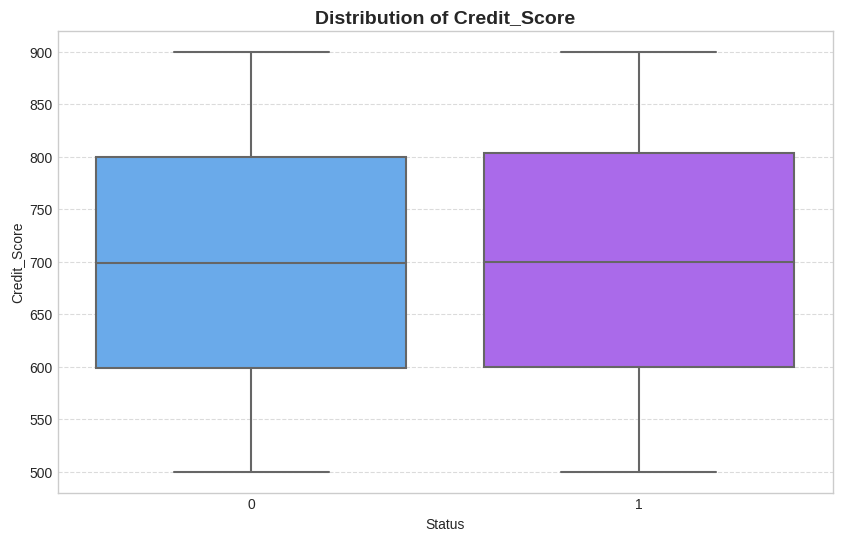

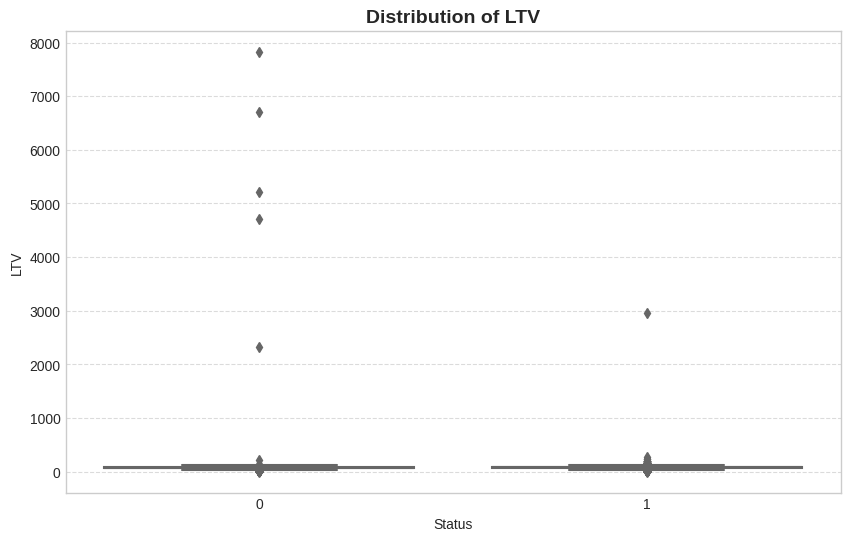

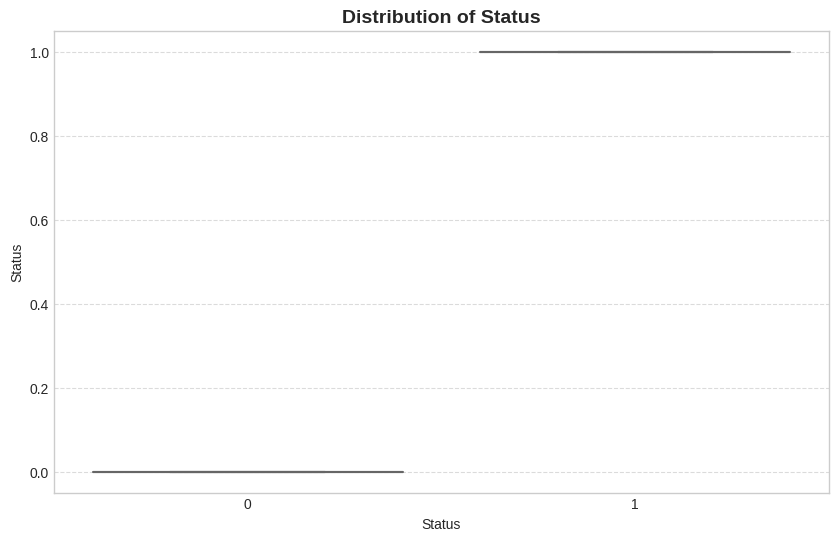

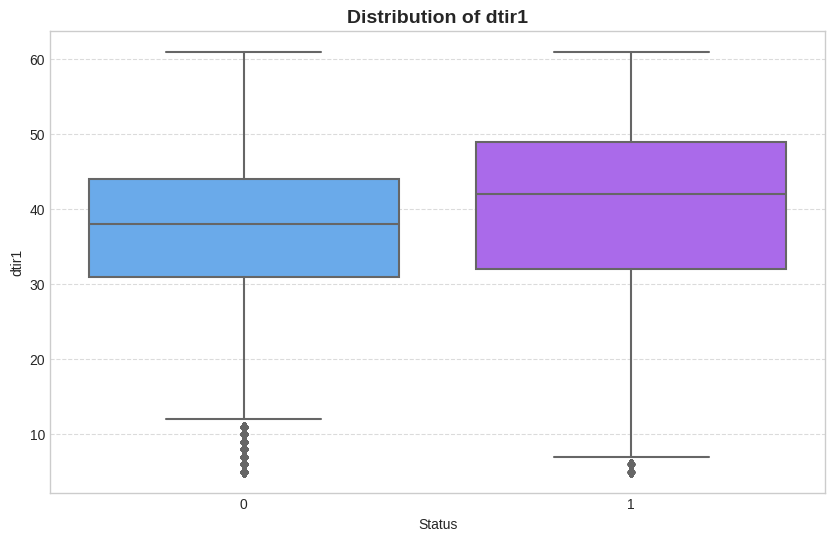

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Status', y=col, data=df, palette='cool')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Status')
    plt.ylabel(col)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

In [18]:
for col in categorical_cols:
    grouped_data = df.groupby('Status')[col].value_counts().unstack(fill_value=0)
    print(f"Counts for {col} grouped by Status:")
    print(grouped_data)
    print("-" * 50)  

Counts for loan_limit grouped by Status:
loan_limit      cf   ncf
Status                  
0           102904  6664
1            32444  3314
--------------------------------------------------
Counts for Gender grouped by Status:
Gender  Female  Joint   Male  Sex Not Available
Status                                         
0        20418  33466  31255              26892
1         6848   7933  11091              10767
--------------------------------------------------
Counts for approv_in_adv grouped by Status:
approv_in_adv  nopre    pre
Status                     
0              93058  18306
1              31563   4835
--------------------------------------------------
Counts for loan_type grouped by Status:
loan_type  type1  type2  type3
Status                        
0          87398  13590  11043
1          25775   7172   3692
--------------------------------------------------
Counts for loan_purpose grouped by Status:
loan_purpose     p1    p2     p3     p4
Status                 

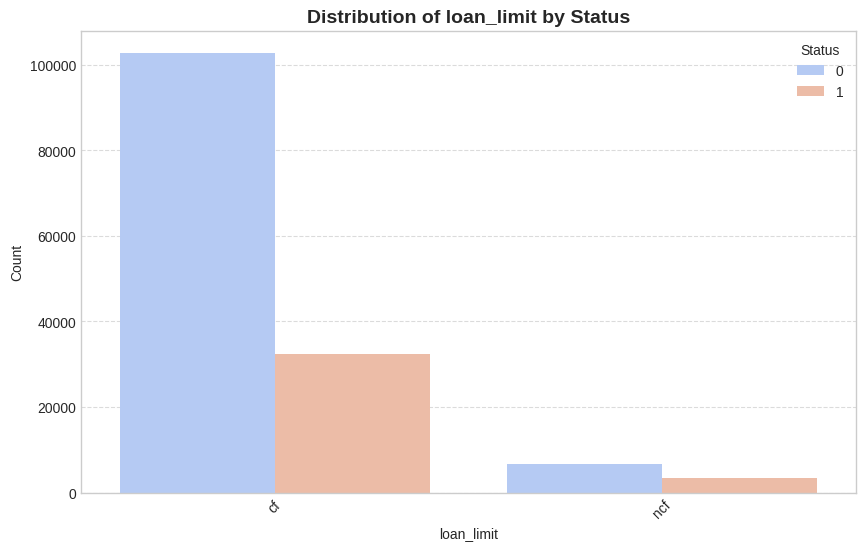

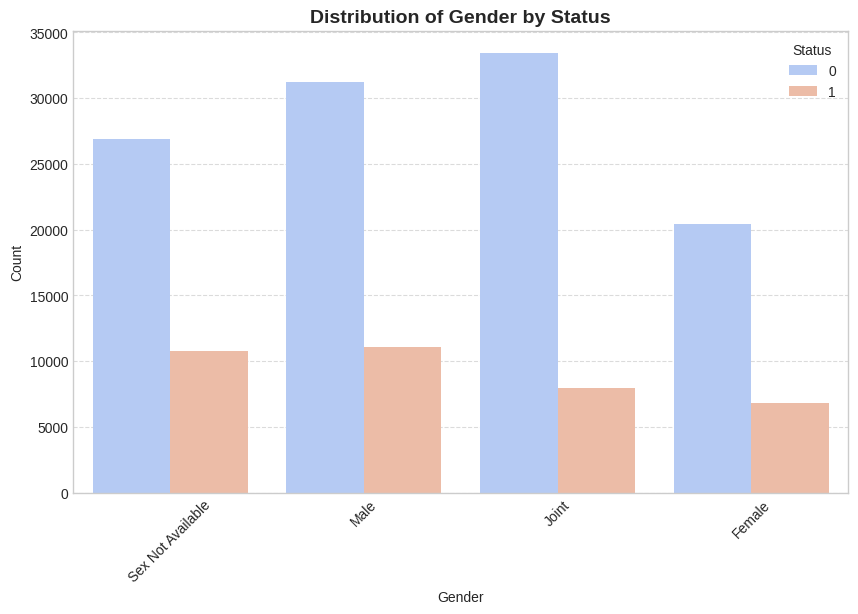

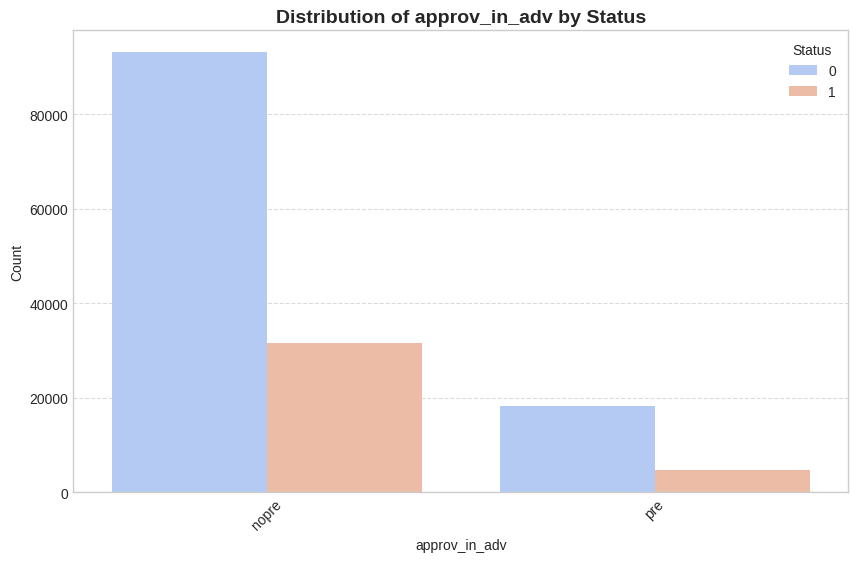

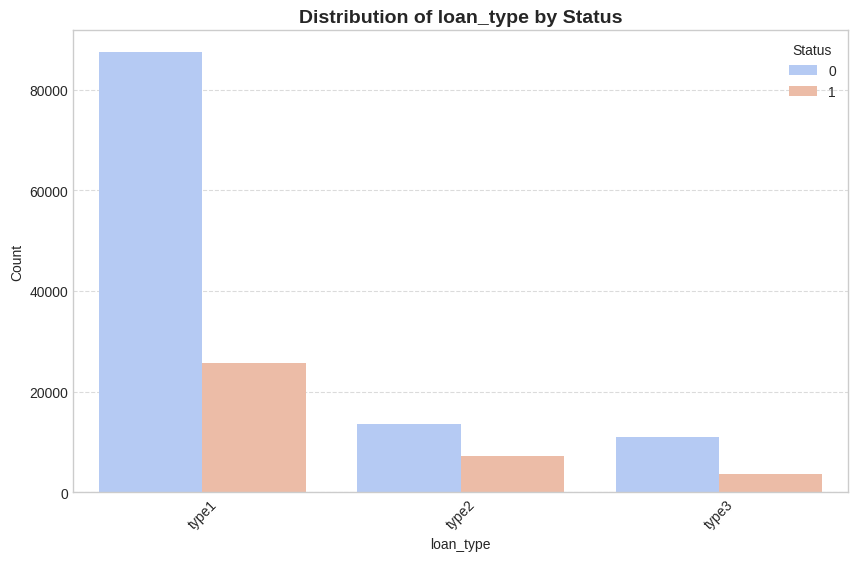

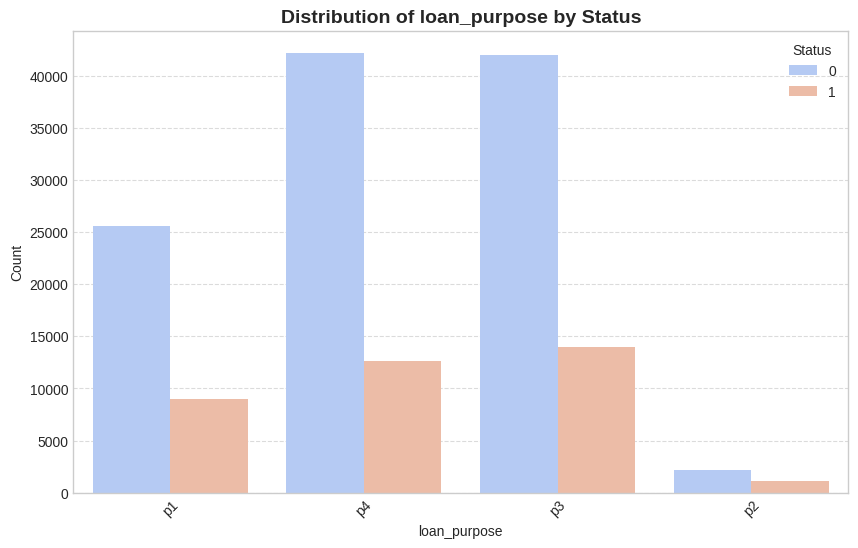

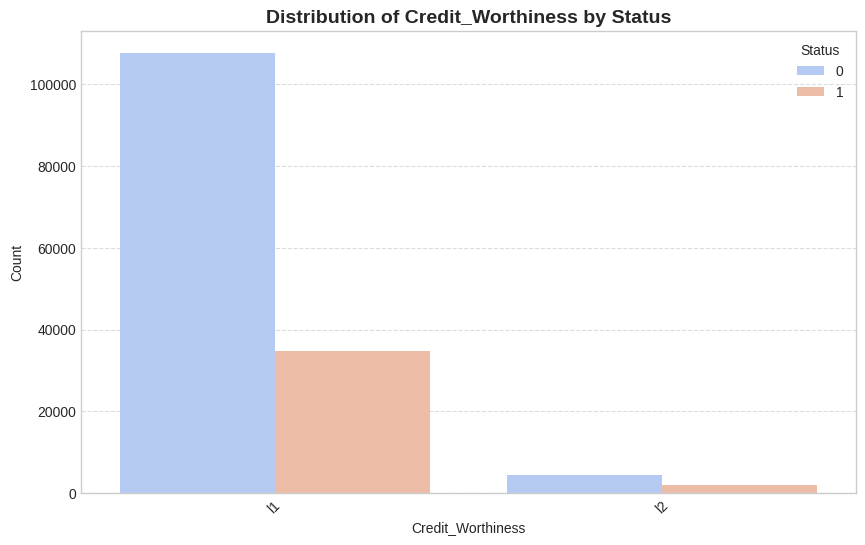

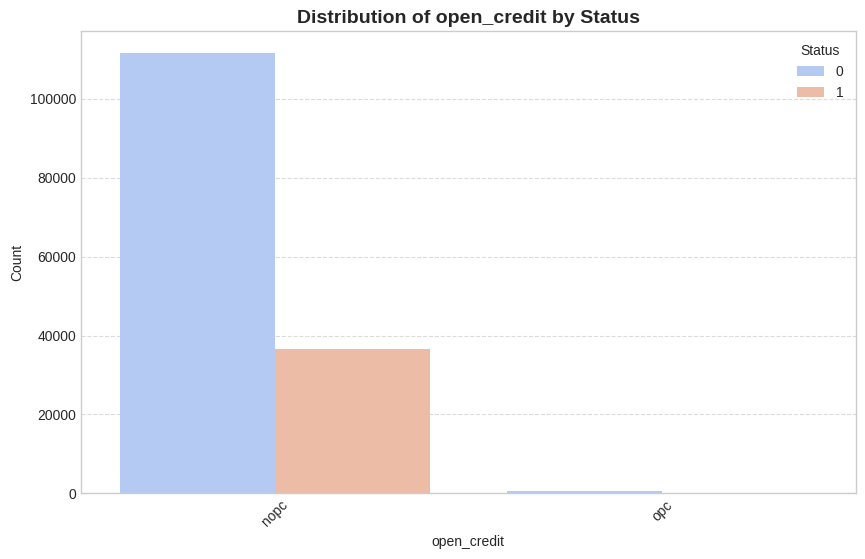

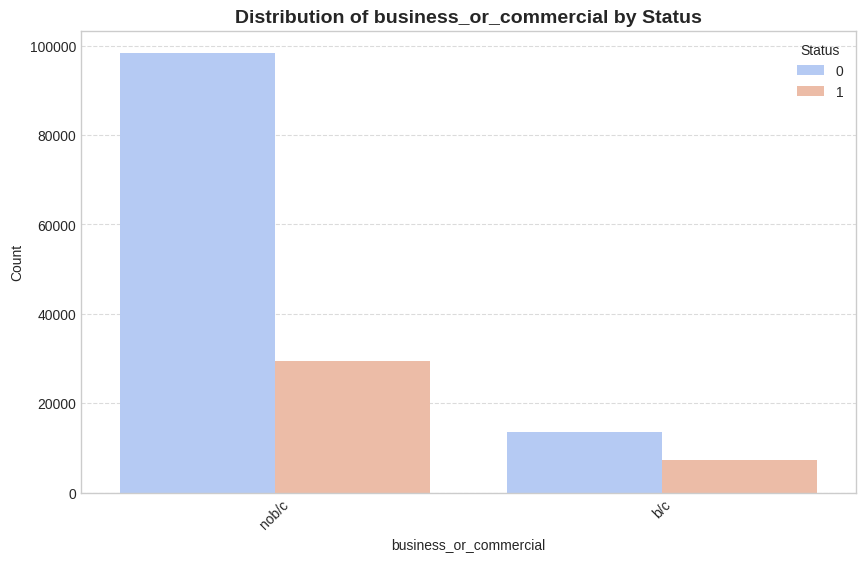

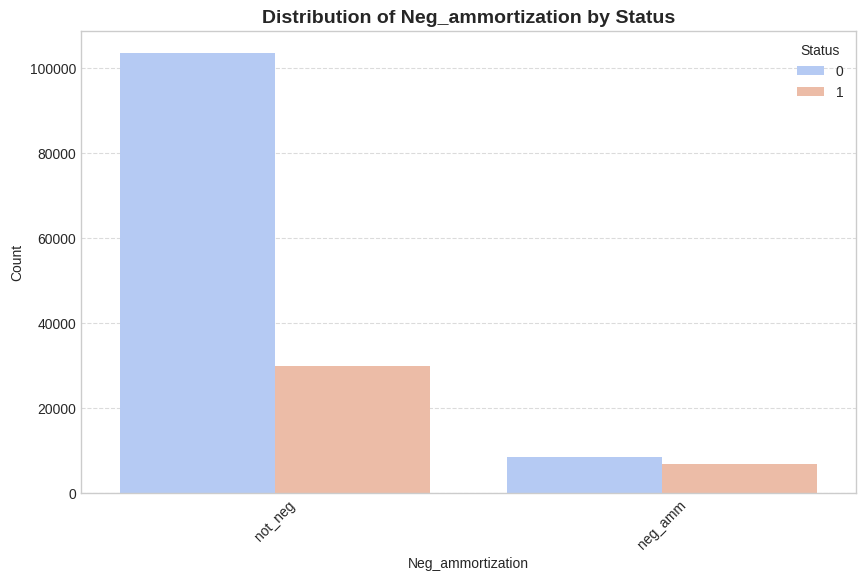

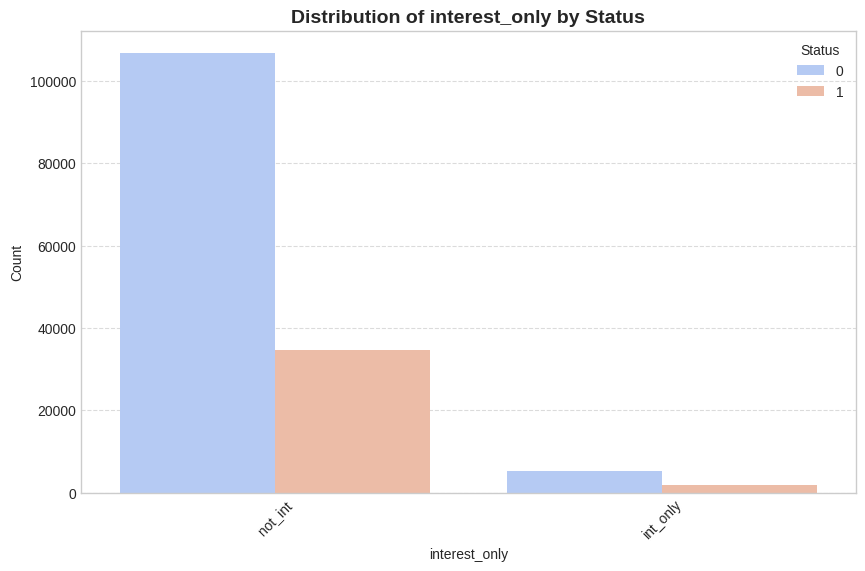

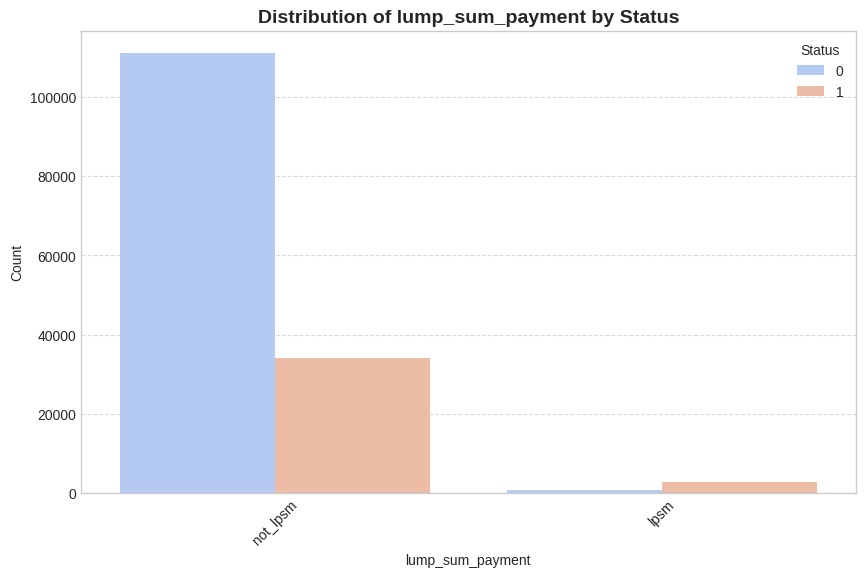

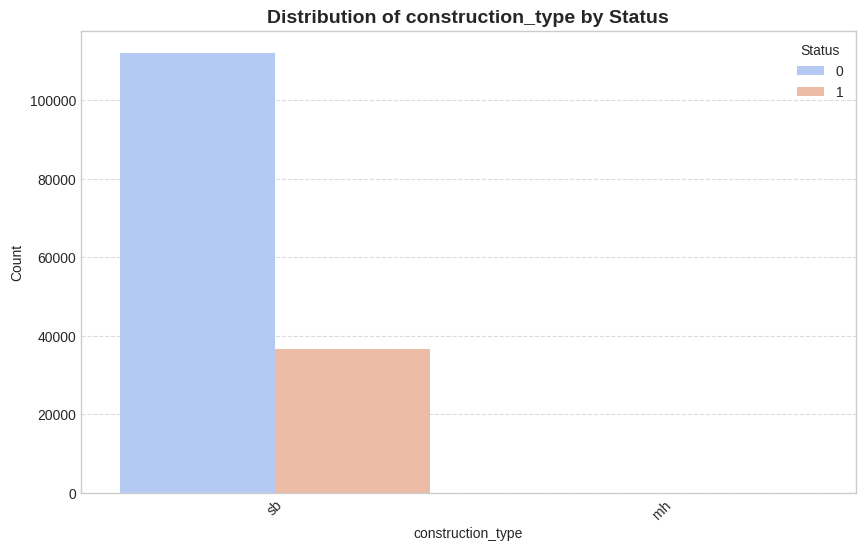

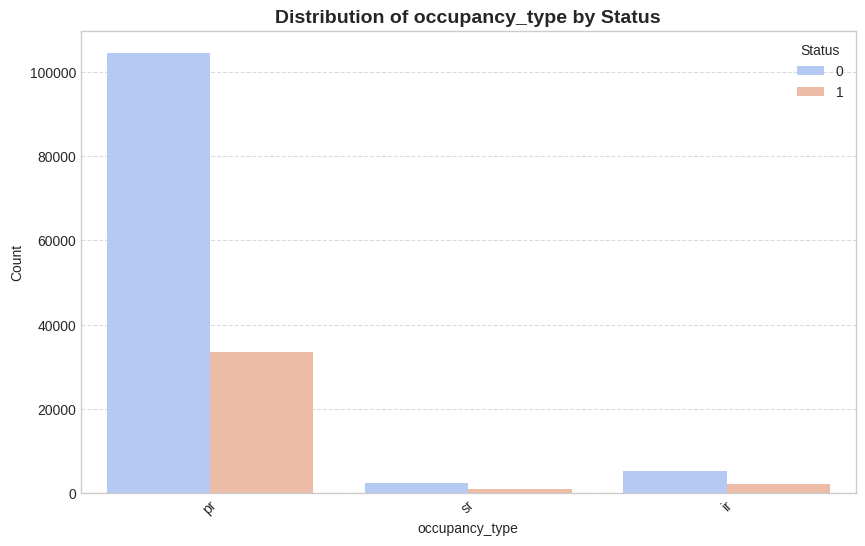

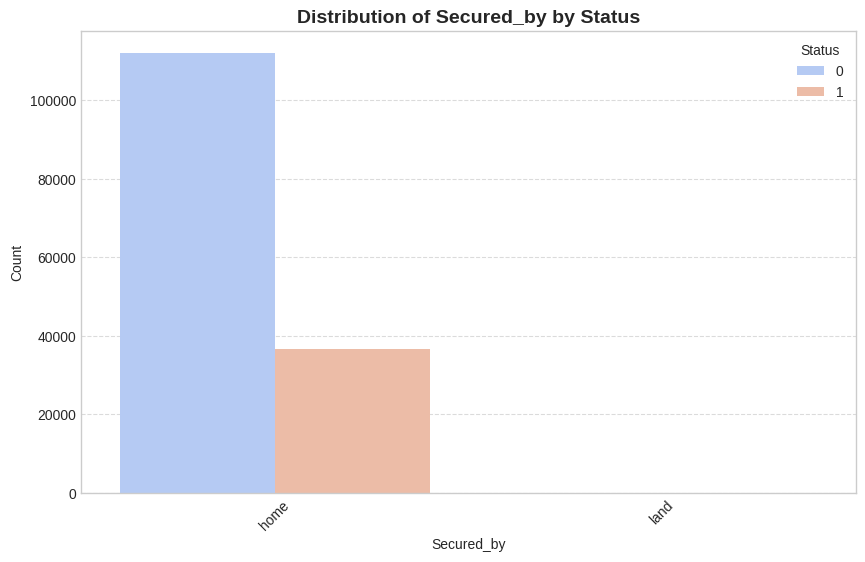

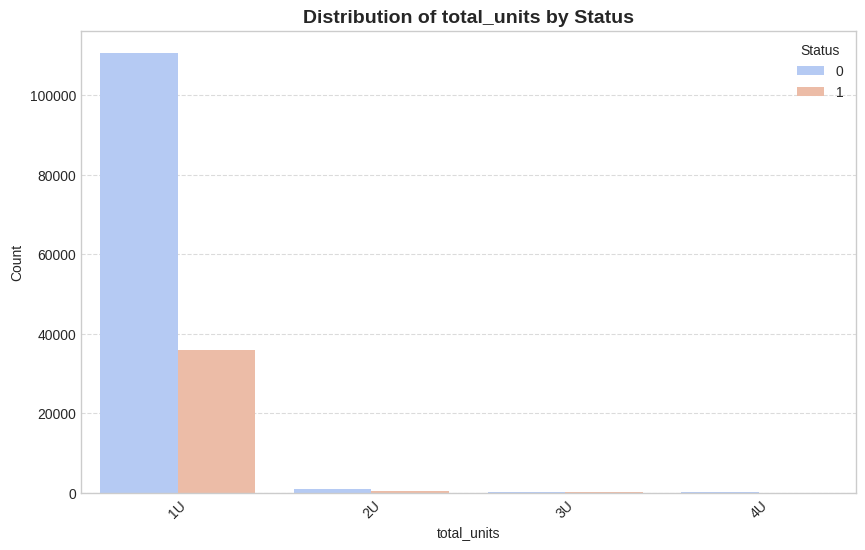

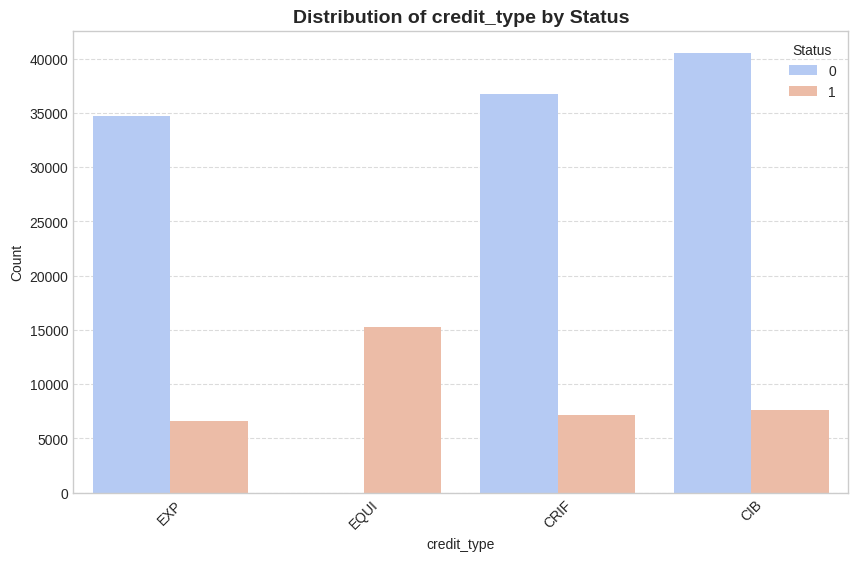

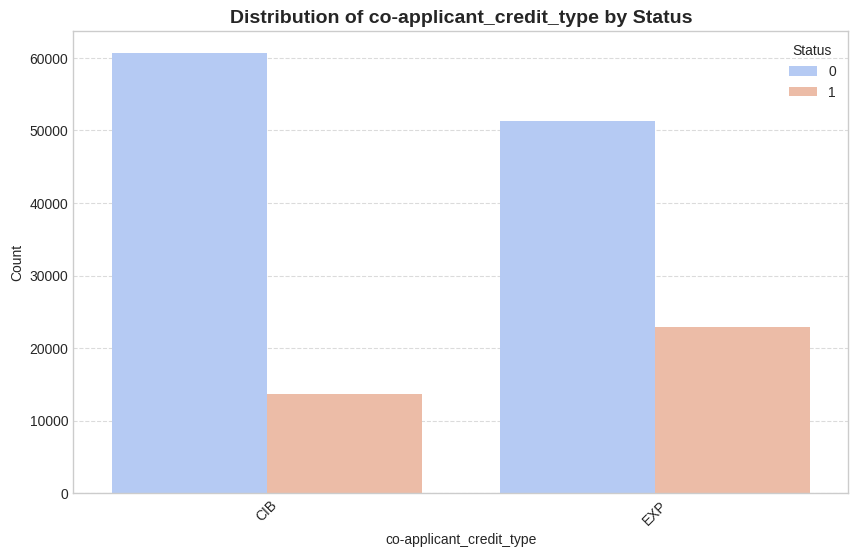

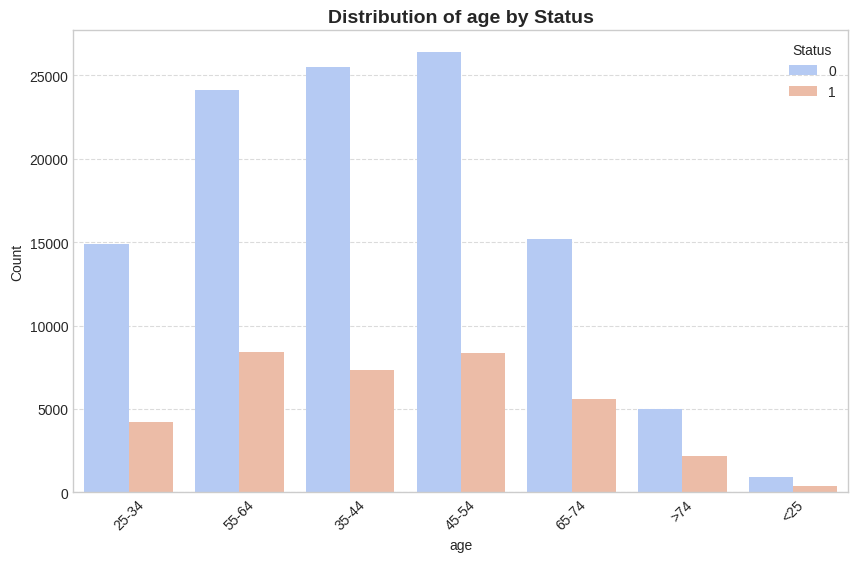

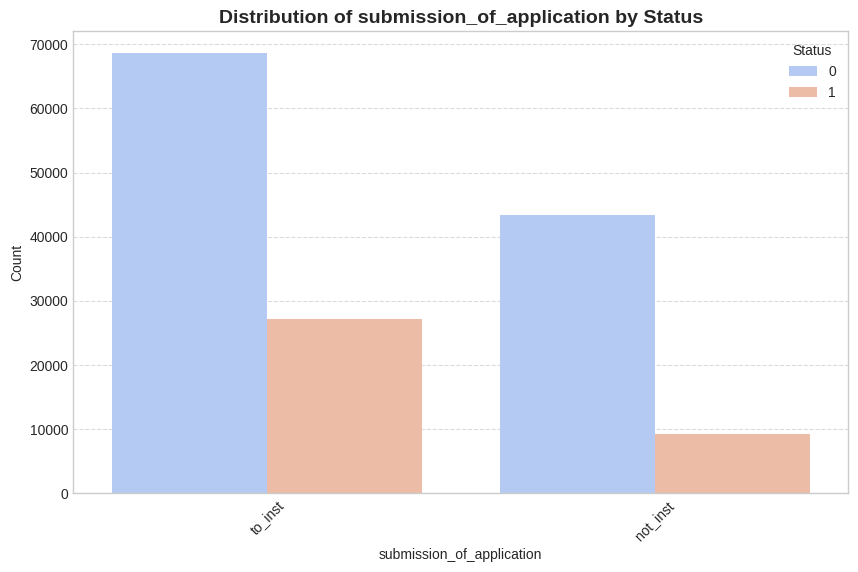

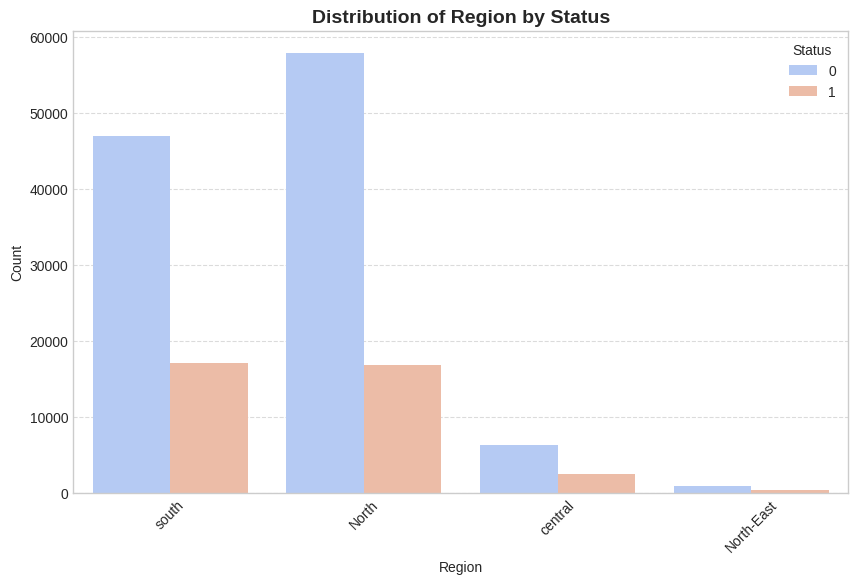

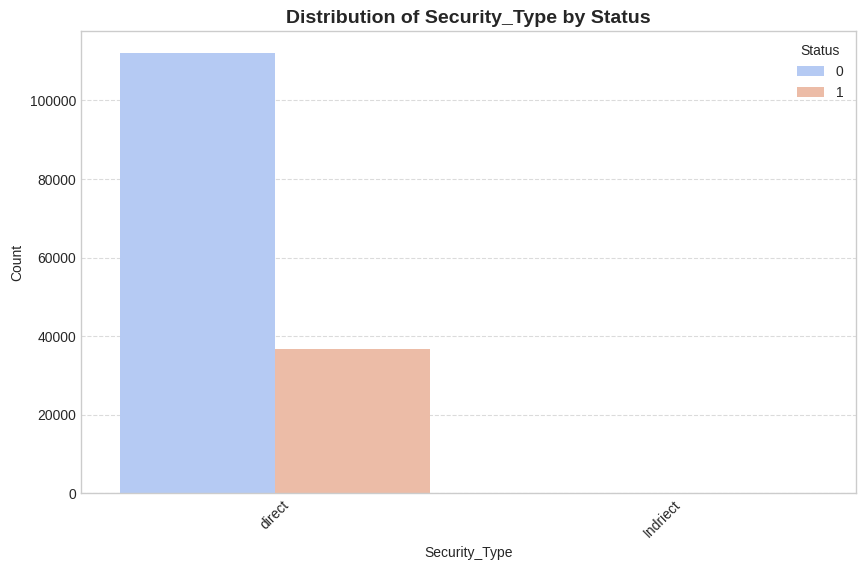

In [19]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Status', palette='coolwarm')
    plt.title(f'Distribution of {col} by Status', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Status')
    plt.show()

### 📊 **Observations from Bivariate Analysis**

#### 🔹 Numeric Features vs Loan Status

- **Loan Amount:** Non-defaulters have a slightly **higher average loan amount (~335K)** than defaulters (~319K), but the difference isn’t huge — indicating loan size alone doesn’t drive default strongly.  
- **Rate of Interest:** The **average interest rate for defaulters (4.35%)** is higher than for non-defaulters (4.04%), suggesting that riskier borrowers are charged more interest — and are more likely to default.  
- **Interest Rate Spread:** Data is mostly missing for defaulters, making it hard to compare, but higher spreads typically indicate riskier loans.  
- **Upfront Charges:** Defaulters pay **lower upfront charges (avg ≈ 1.5K)** compared to non-defaulters (≈ 3.2K), possibly due to smaller or subsidized loans.  
- **Property Value:** Defaulters own **less valuable properties (avg ≈ 457K)** than non-defaulters (≈ 505K), hinting at weaker financial backgrounds.  
- **Income:** Defaulters earn less (≈ 6.2K) than non-defaulters (≈ 7.2K), which directly correlates with repayment capacity.  
- **Credit Score:** Interestingly, both groups have similar average credit scores (~700), but variability might hide riskier subgroups.  
- **Loan-to-Value (LTV):** Defaulters have slightly **higher LTV ratios (76.3%)** compared to non-defaulters (72.0%), meaning they borrow more relative to property value — a risk factor for default.  
- **DTIR (Debt-to-Income Ratio):** Defaulters have a **higher average DTIR (≈ 39.6)** than non-defaulters (≈ 37.3), showing that more indebted borrowers tend to default.

---

#### 🔹 Categorical Features vs Loan Status

- **Loan Limit:** Majority are **conforming (cf)** loans, with slightly fewer defaults — non-conforming loans (ncf) show higher risk.  
- **Gender:** **Male** and **Joint** applicants dominate, but **Sex Not Available** category has a surprisingly high proportion of defaults — possible data quality or demographic pattern.  
- **Approval in Advance:** Borrowers with **pre-approved loans (pre)** default less — early screening clearly helps reduce risk.  
- **Loan Type:** **Type1** loans (possibly standard loans) perform better, while **Type2/Type3** loans default more often.  
- **Loan Purpose:** **p3 and p4** (possibly refinancing or non-primary purposes) have more defaults than **p1 (primary)** loans.  
- **Credit Worthiness:** As expected, borrowers marked as **“l2” (lower credit quality)** default at much higher rates.  
- **Open Credit:** Those without open credit accounts (**nopc**) default more, indicating a lack of active credit history.  
- **Business or Commercial Loans:** Business loans (**b/c**) have a significantly higher default rate than personal ones (**nob/c**).  
- **Negative Amortization:** Loans with **negative amortization (neg_amm)** show higher defaults — deferred interest is risky.  
- **Interest Only Loans:** Default rate is higher for **interest-only** loans compared to standard ones.  
- **Lump Sum Payment:** Loans with **lump-sum payments (lpsm)** have more defaults — large end payments increase pressure.  
- **Construction Type:** Very few **manufactured homes (mh)** exist, but all of them defaulted — a clear risk signal.  
- **Occupancy Type:** **Investor (ir)** and **secondary (sr)** properties default more than **primary residences (pr)**.  
- **Secured By:** **Land-secured loans** are few but all defaulted — less liquid security increases risk.  
- **Total Units:** Multi-unit properties (**3U, 4U**) have slightly higher default rates compared to single-unit (**1U**) properties.  
- **Credit Type:** Defaulters are more common among **EQUI** and **CIB** types — possibly lower credit bureau grades.  
- **Co-applicant Credit Type:** Defaults are higher when the **co-applicant uses EXP** credit — a minor but consistent pattern.  
- **Age:** Younger borrowers (**25–34**) and elderly (**>74**) show higher default rates — financial instability on both ends.  
- **Submission of Application:** **Direct submissions (to_inst)** tend to perform better than **indirect (not_inst)** applications.  
- **Region:** **South** and **North** regions dominate both volume and defaults, suggesting possible regional economic differences.  
- **Security Type:** All **indirectly secured loans** defaulted — direct security offers better repayment confidence.

---

### 💡 **Key Insights**

- Defaulters tend to have **lower income, lower property value, higher interest rate, and higher LTV** — all pointing toward higher financial risk.  
- Riskier loan structures (**interest-only, lump-sum, or business loans**) are more likely to default.  
- Pre-approval, better creditworthiness, and primary residence ownership **significantly reduce default probability**.  
- Regional and demographic patterns suggest **socio-economic influences** in repayment behavior.

## 🔺 **Step 2.3: Multivariate Analysis — When the Variables Collide!**

Now that we’ve explored each feature individually (Univariate) and in pairs (Bivariate),  
it’s time to uncover how **multiple features interact together** to influence loan defaults.  

Real-world data is rarely one-dimensional — borrowers’ income, credit score, and loan value  
often **combine in complex ways** to shape repayment behavior.  

In this step, we’ll dive into:
- 📈 **Pairplots and correlation patterns** among key numeric variables  
- 🎯 **Multivariate boxplots and heatmaps** to detect hidden relationships  
- 🧩 **Feature interactions** that may drive default risk  

Let’s see what happens when all the key players share the stage!


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

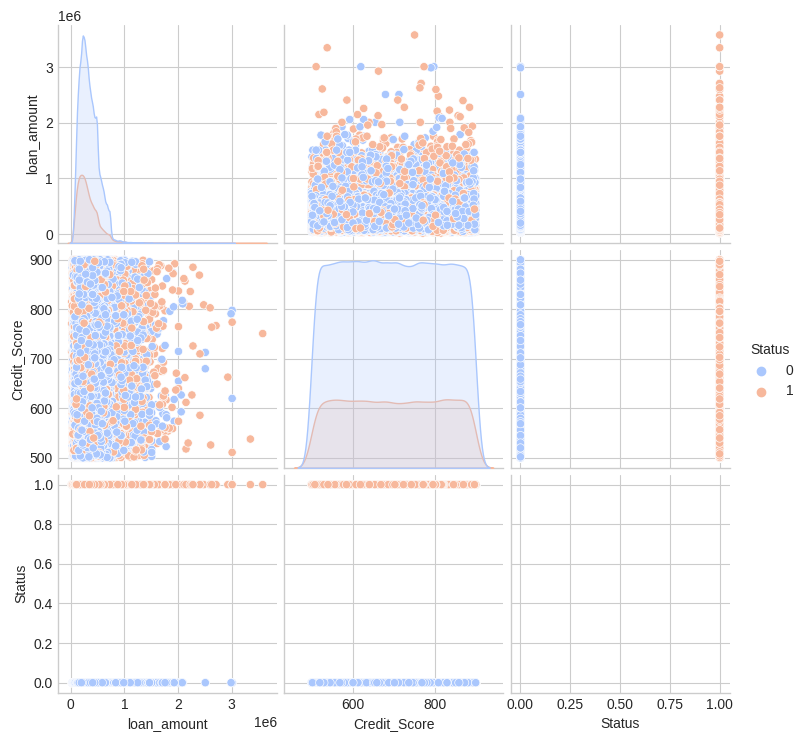

In [21]:
sns.pairplot(df, vars=['loan_amount', 'Credit_Score', 'Status'], hue='Status', palette='coolwarm')
plt.show()

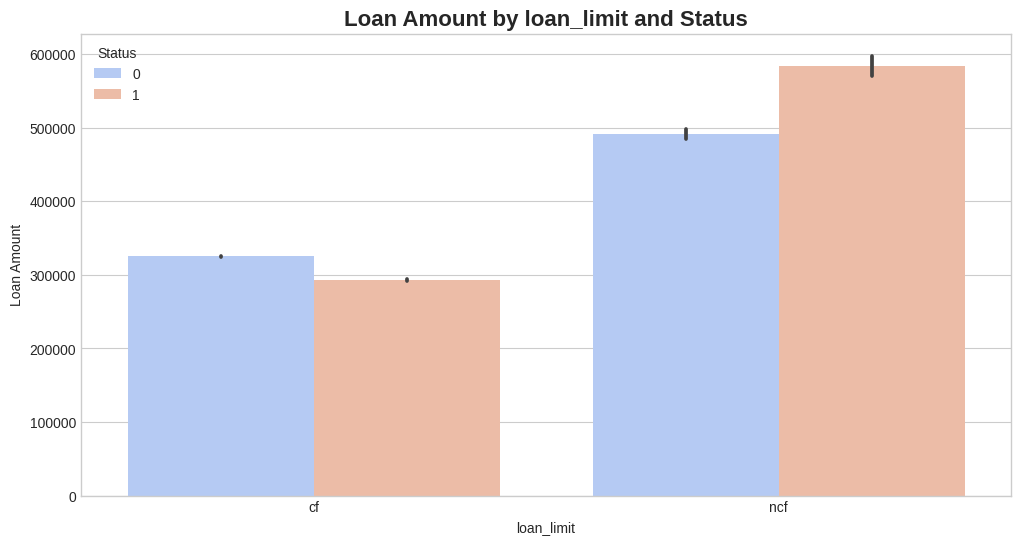

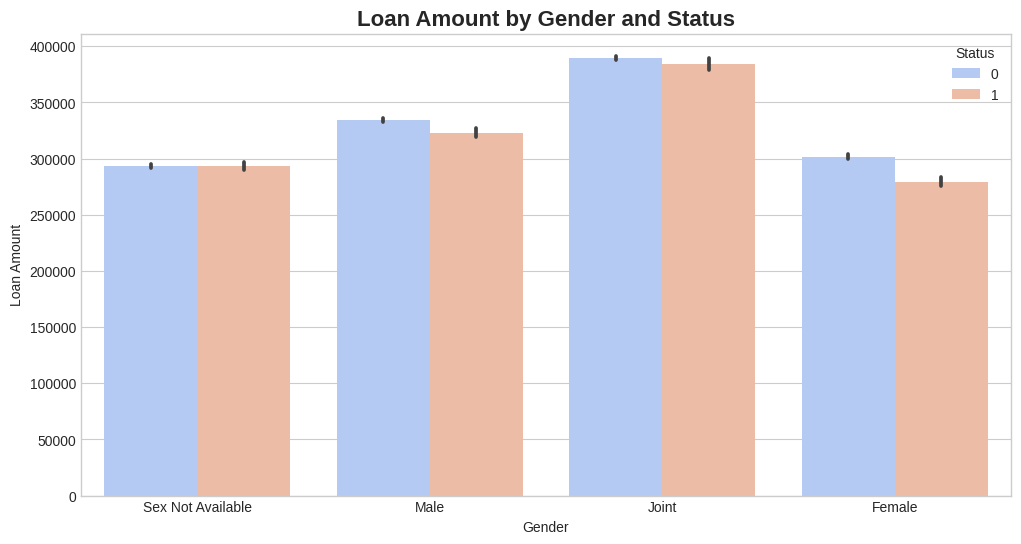

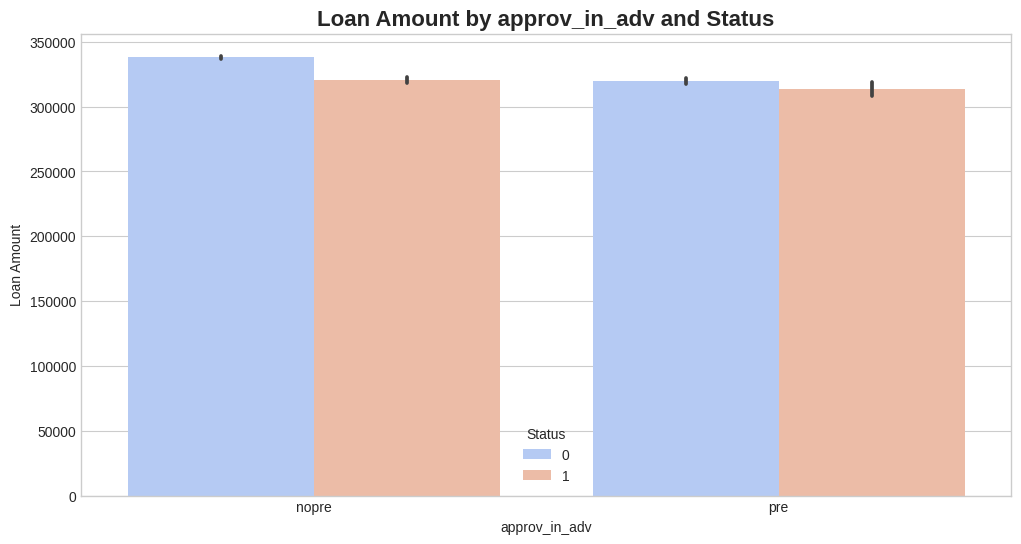

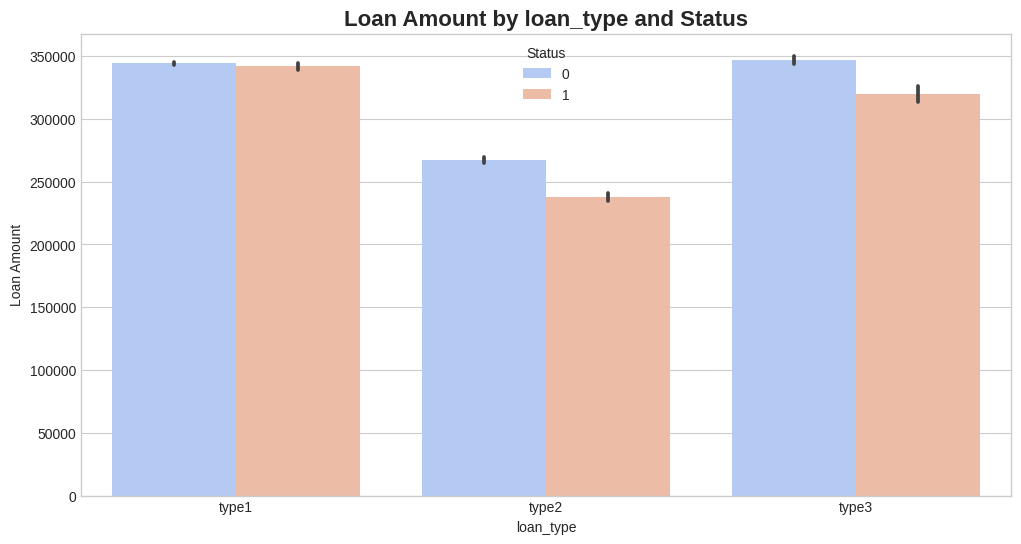

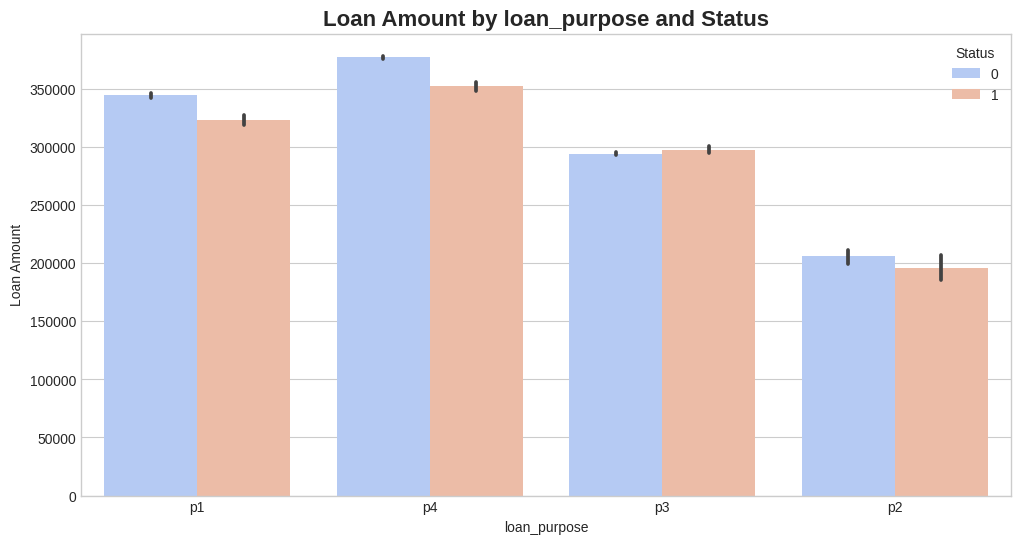

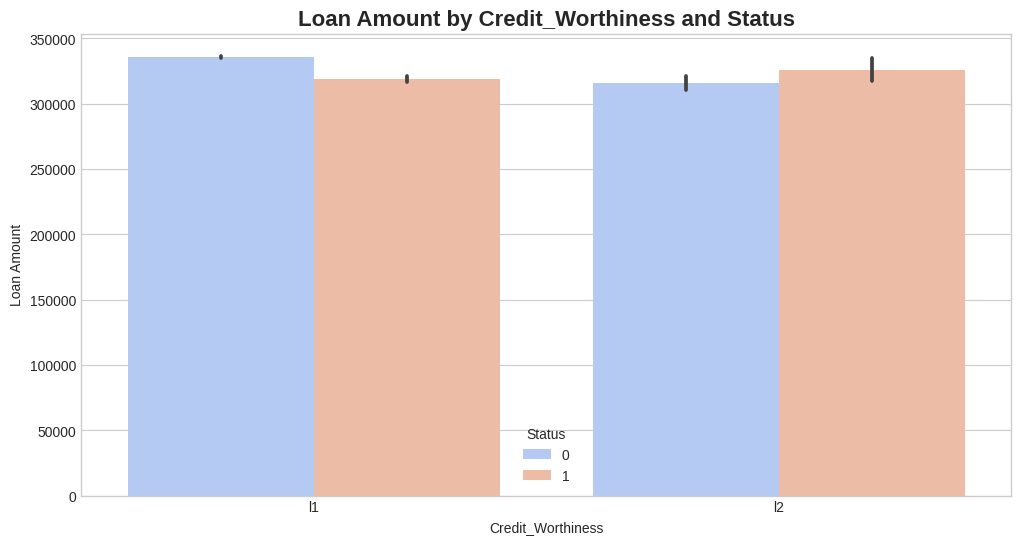

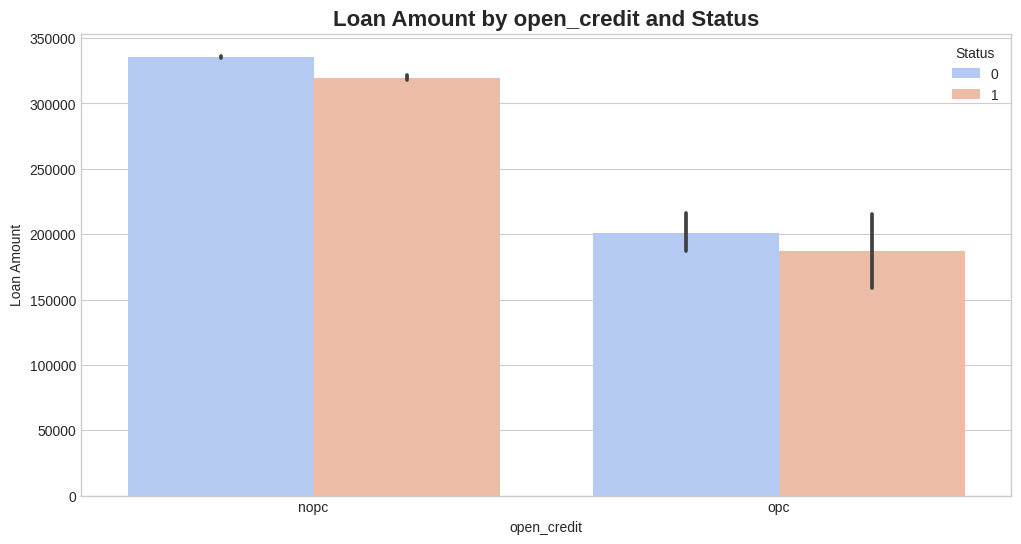

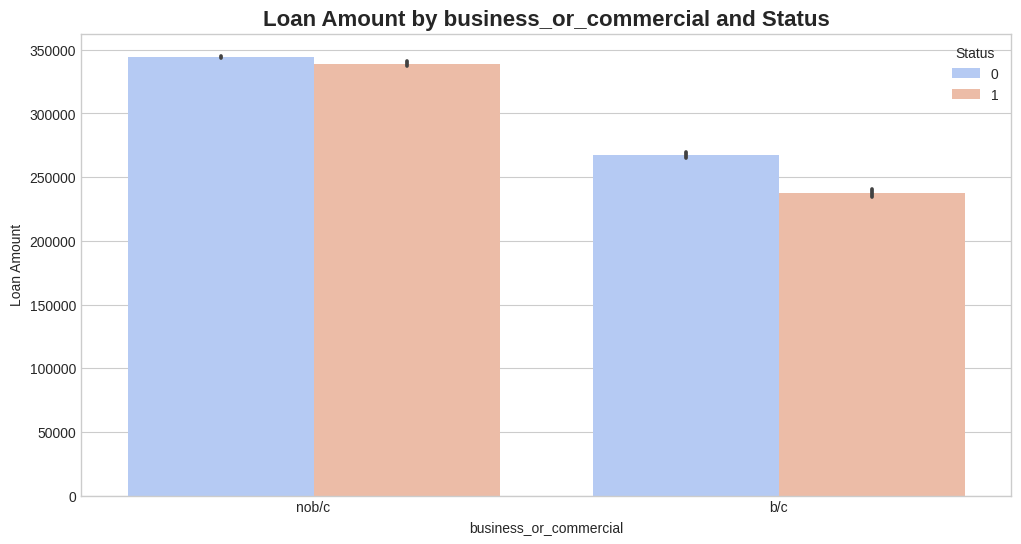

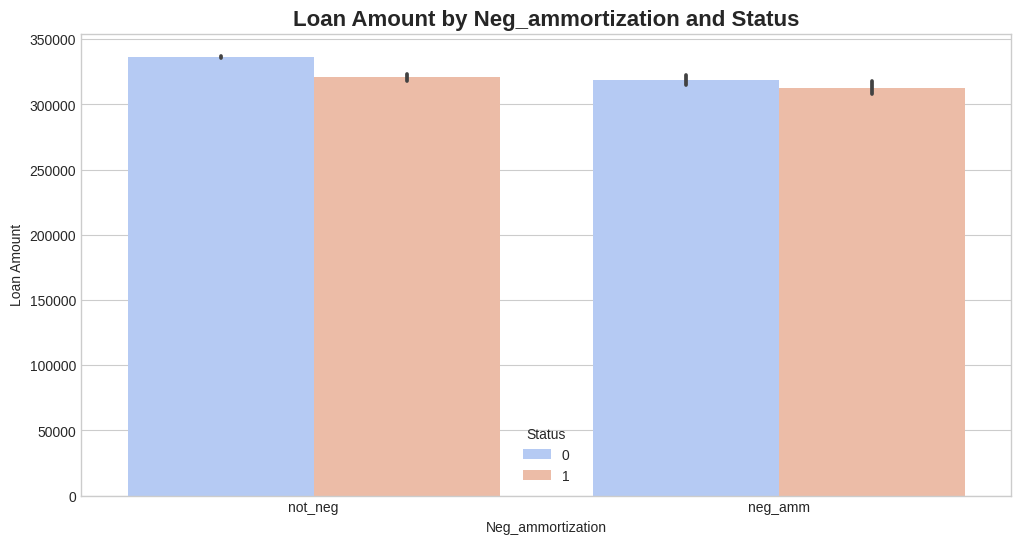

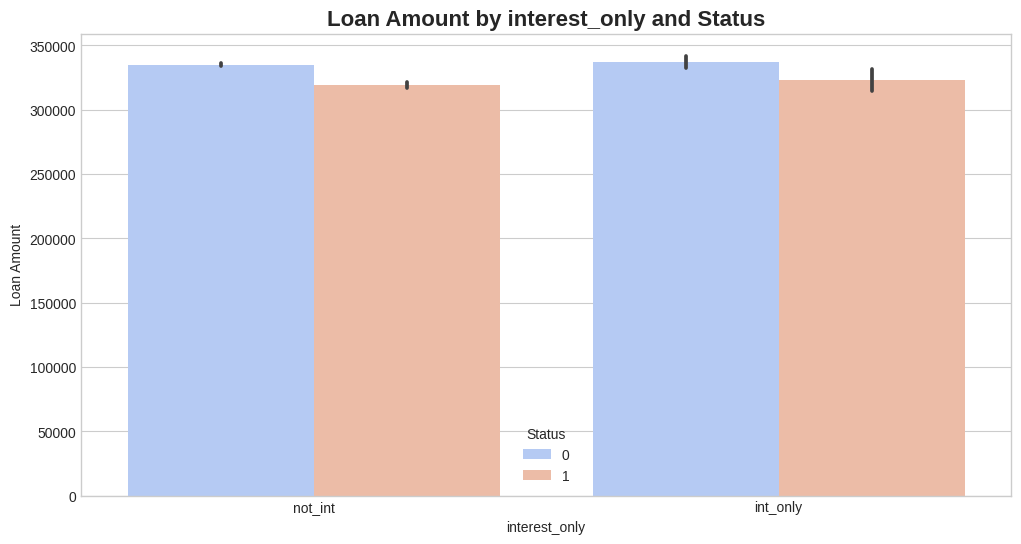

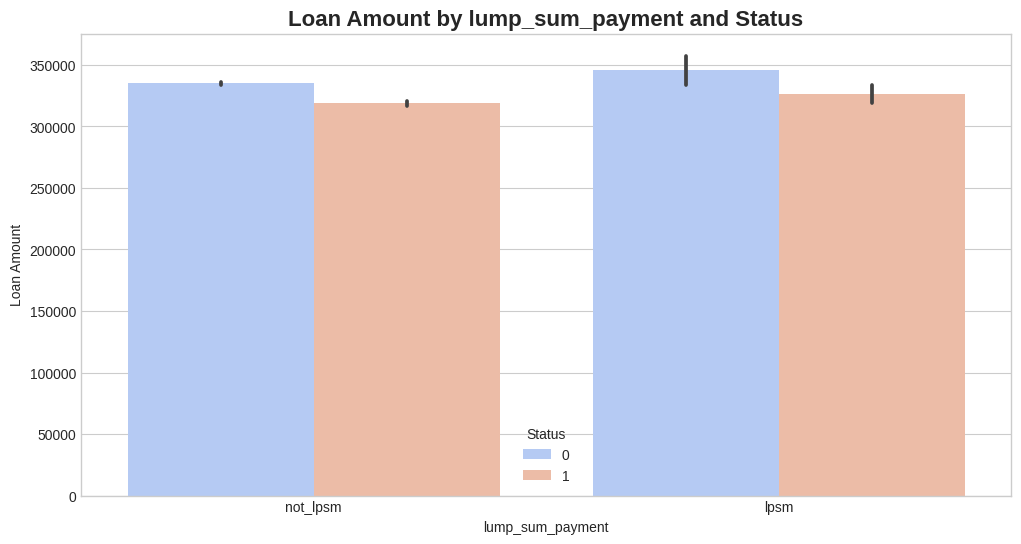

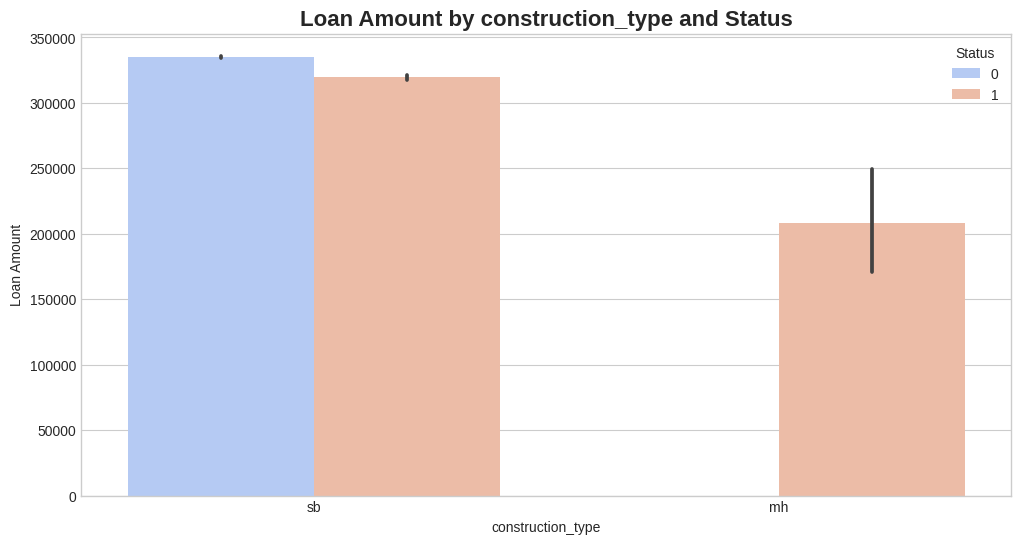

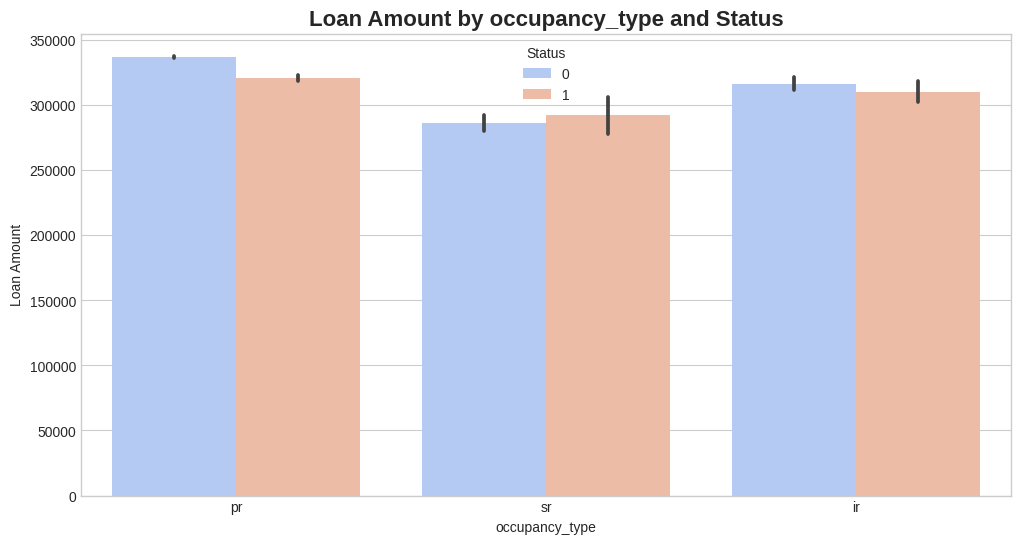

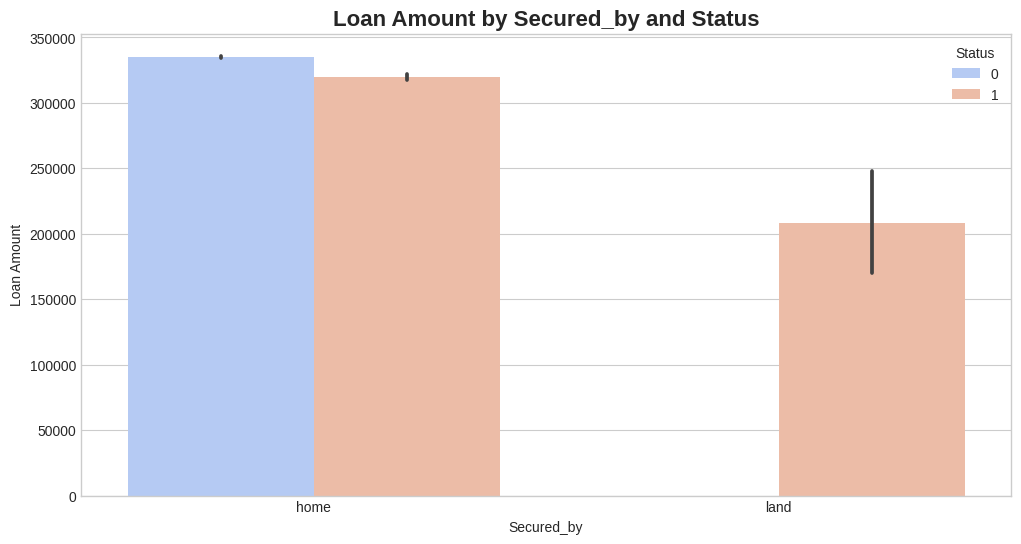

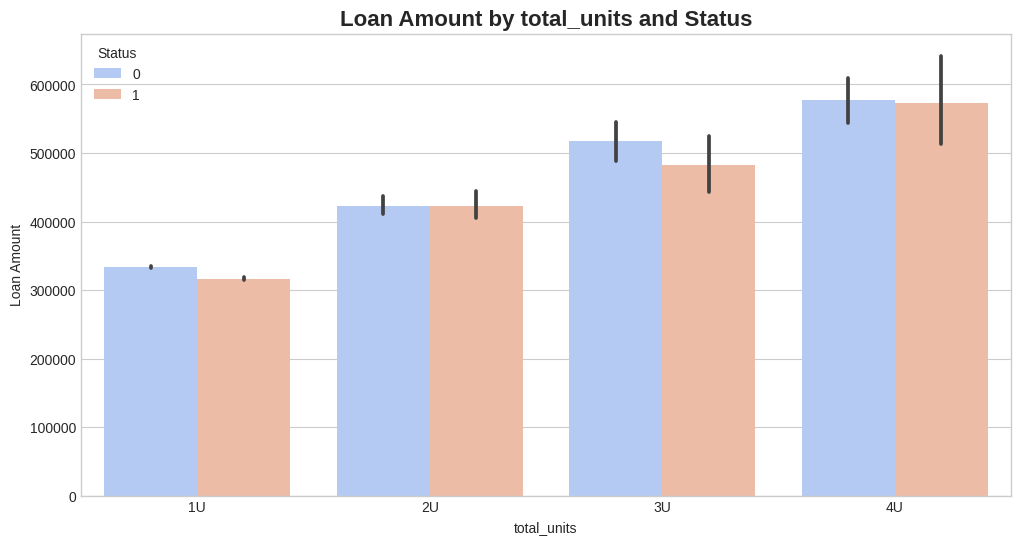

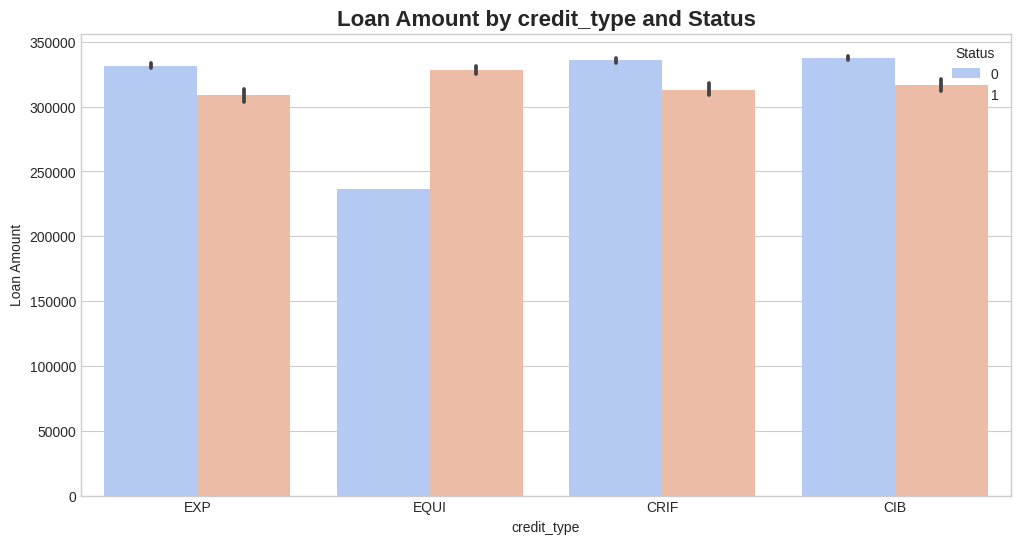

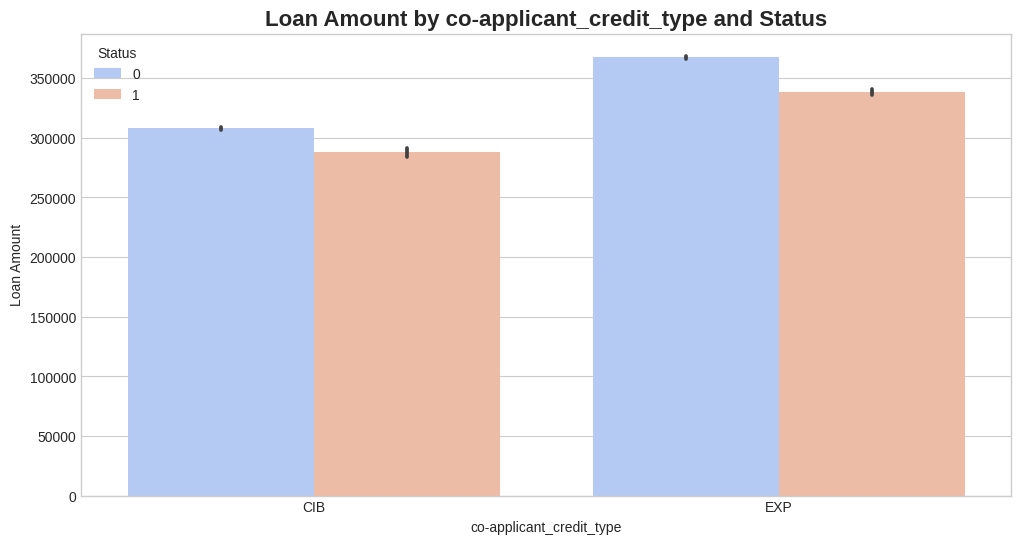

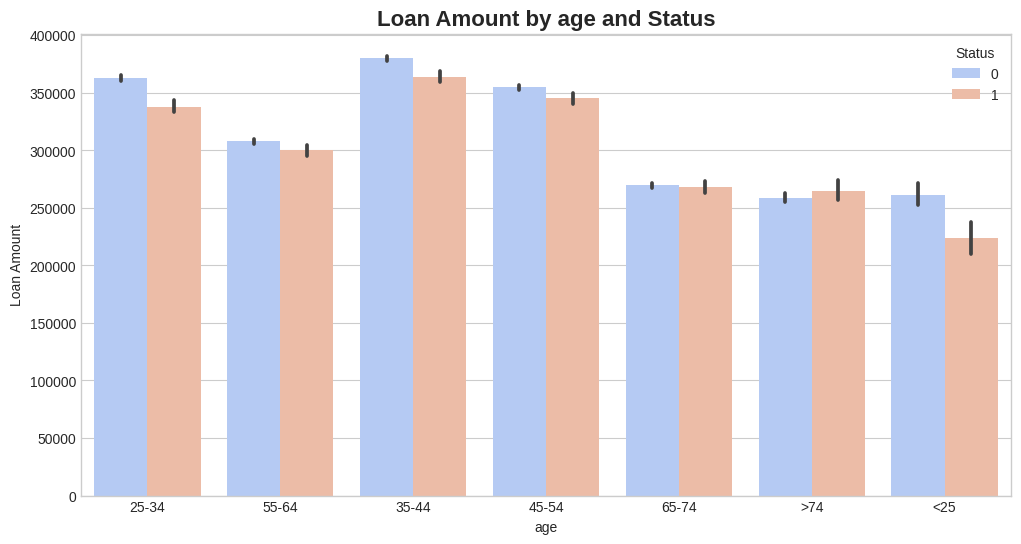

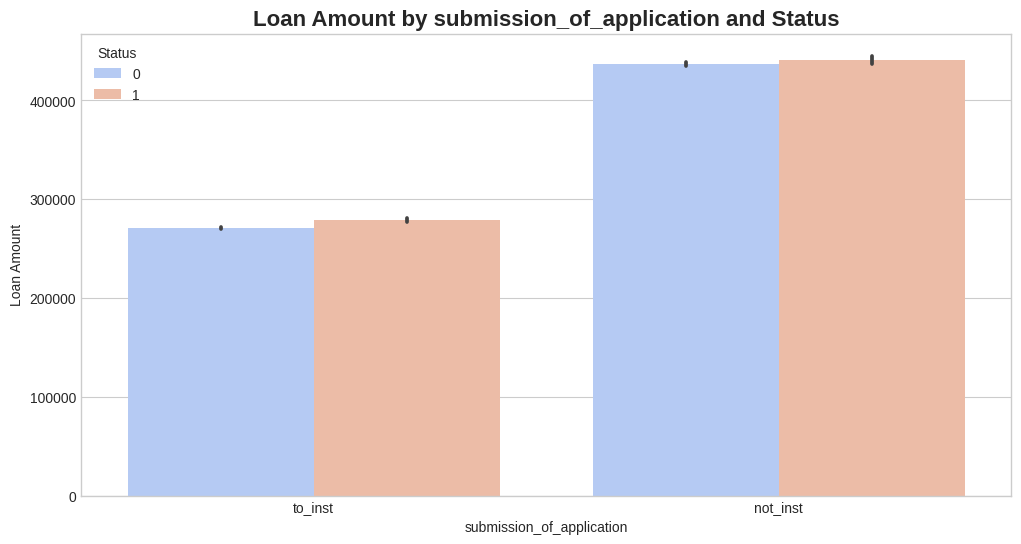

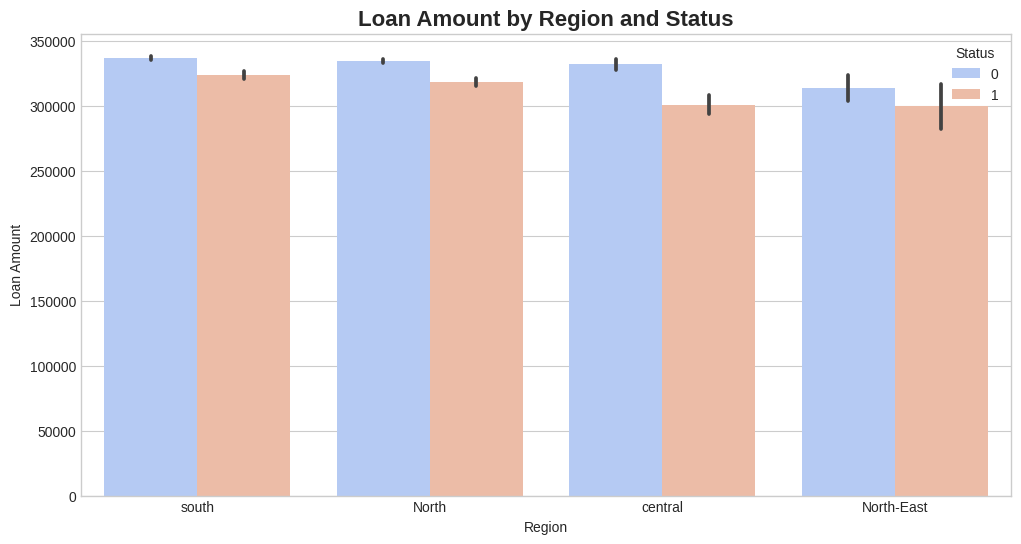

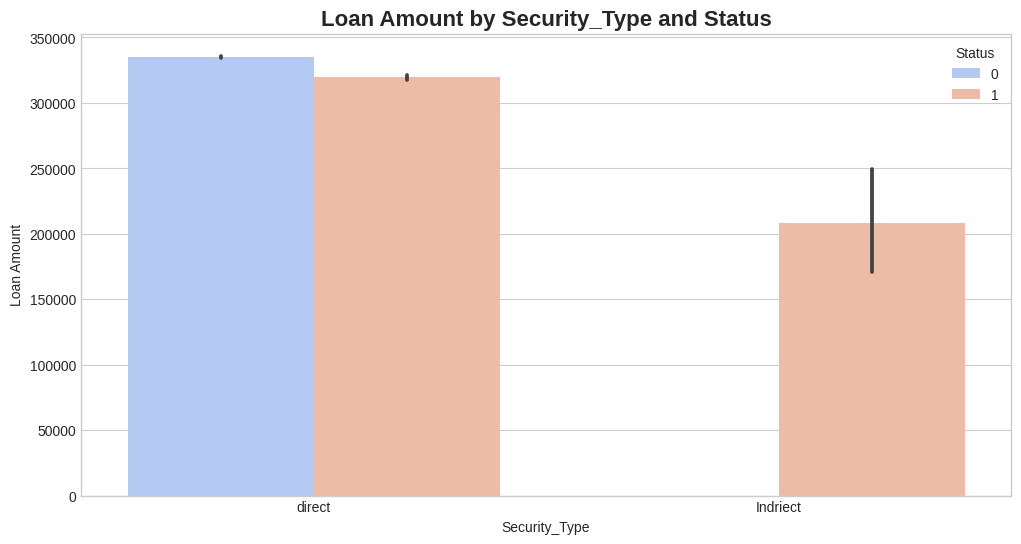

In [22]:
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=col, y='loan_amount', hue='Status', data=df, palette='coolwarm')
    plt.title(f'Loan Amount by {col} and Status',fontsize=16, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Loan Amount')
    plt.xticks(rotation=0)
    plt.legend(title='Status')
    plt.show()

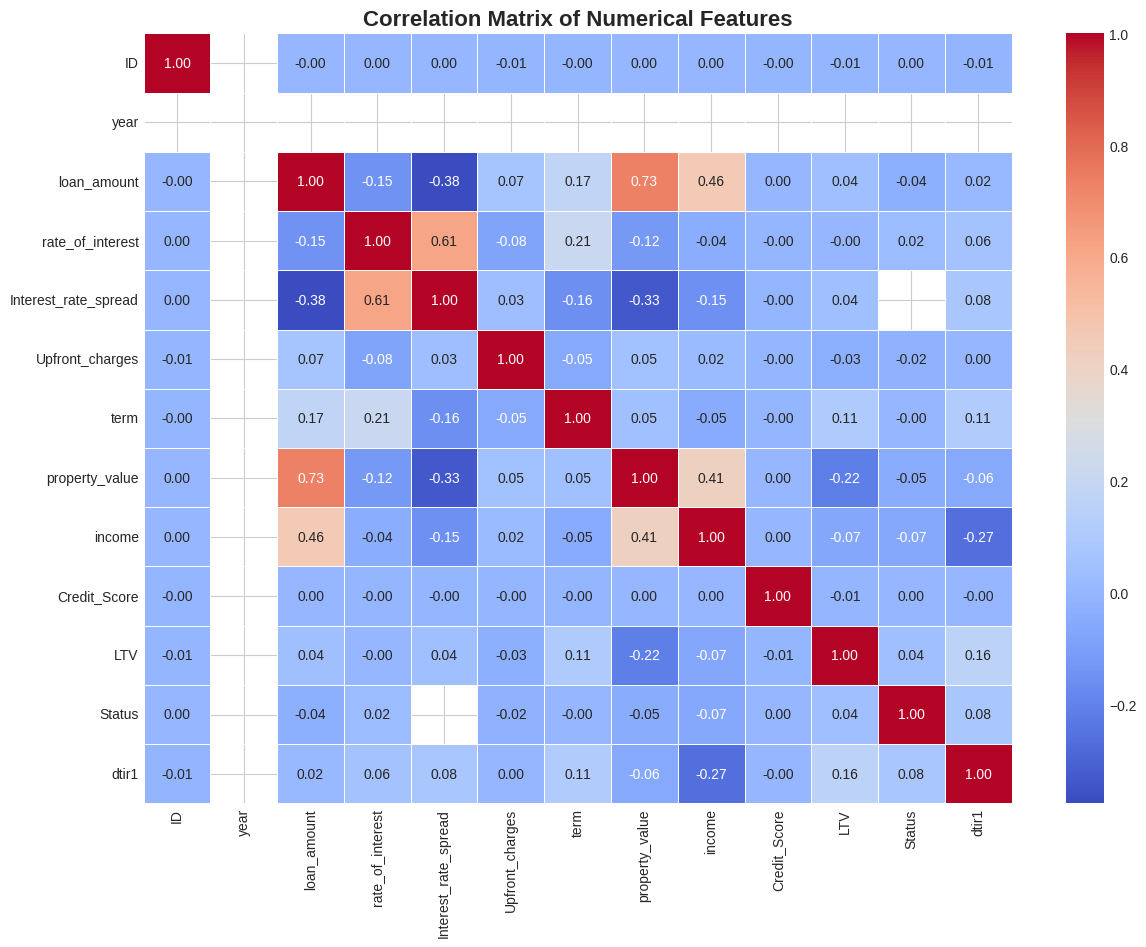

In [23]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=16, fontweight='bold')
plt.show()


### 🧩 Correlation Matrix — Insights & Observations

- **Loan Amount ↔ Property Value (0.73)** → Very strong positive correlation, meaning larger properties tend to have higher loan amounts.  
- **Loan Amount ↔ Income (0.46)** → Moderate positive correlation, suggesting that applicants with higher income usually take larger loans.  
- **Loan Amount ↔ Term (0.17)** → Slight positive correlation — higher loan amounts might slightly increase loan duration.  
- **Loan Amount ↔ Interest Rate (-0.15)** → Weak negative correlation — larger loans tend to have slightly lower interest rates, possibly due to better credit terms for high-value customers.  

- **Property Value ↔ Income (0.41)** → Strong positive correlation — higher income is linked to more expensive properties.  
- **Property Value ↔ LTV (-0.21)** → Negative correlation — when property value increases, the loan-to-value ratio decreases, indicating lower lending risk.  

- **Rate of Interest ↔ Interest Rate Spread (0.61)** → Strong positive correlation, which makes sense since both metrics reflect lending cost structures.  
- **Interest Rate Spread ↔ Loan Amount (-0.37)** → Negative correlation — larger loans tend to have smaller spreads, likely due to better-negotiated terms.  

- **Income ↔ DTI Ratio (-0.26)** → Moderate negative correlation — higher-income applicants have lower debt-to-income ratios, implying better financial stability.  
- **LTV ↔ DTI Ratio (0.16)** → Positive correlation — higher LTV loans are associated with slightly higher debt burdens.  

- **Credit Score ↔ Rate of Interest (-0.00)** → Almost zero correlation — credit scores have minimal linear influence on interest rates in this dataset.  
- **Credit Score ↔ Loan Amount (0.00)** → No significant correlation — loan amounts aren’t directly tied to credit scores.  

- **Status (Target) ↔ DTI Ratio (0.08)** → Weak positive correlation — higher DTI ratios slightly increase default likelihood.  
- **Status ↔ Loan Amount (-0.03)** and **Status ↔ Property Value (-0.04)** → Weak negative correlations — smaller loans and properties show a slightly higher risk of default.  

---

### 💡 Key Takeaway
The dataset shows meaningful relationships between **Loan Amount, Property Value, and Income**, forming the backbone of financial decision-making.  
However, **Credit Score** and **Interest Rate** appear surprisingly weakly correlated — indicating that other factors might play a stronger role in determining loan status.


#  **3. Data Preprocessing — Preparing the Ground for Modeling**

Before diving into model building, we need to ensure our data is clean, consistent,  
and ready for machine learning algorithms to understand.  

In this step, we’ll handle **missing values**, **encode categorical variables**, **scale numeric features**,  
and **split the dataset** into training and testing sets — setting the stage for accurate predictions.


In [24]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (accuracy_score, classification_report, 
confusion_matrix, roc_auc_score, average_precision_score ,roc_curve,auc,precision_recall_curve)

import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
columns_to_remove = [
    'ID', 'year', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges',
    'business_or_commercial', 'Secured_by', 'Security_Type'
]
df = df.drop(columns=columns_to_remove, errors='ignore')

# Handle credit_type leakage
df['credit_type'] = df['credit_type'].replace('EQUI', np.nan)


In [26]:
# ==========================
# 4. Split Features/Target
# ==========================
X = df.drop('Status', axis=1)
y = df['Status']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [27]:
# ==========================
# 5. Preprocessing Pipelines
# ==========================
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # fills NaN including EQUI
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ==========================
# 6. Train/Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================
# 7. Preprocess Data
# ==========================
X_train_processed = preprocessor.fit_transform(X_train)
X_train_processed = np.nan_to_num(X_train_processed).astype(np.float32)

X_test_processed = preprocessor.transform(X_test)
X_test_processed = np.nan_to_num(X_test_processed).astype(np.float32)

In [28]:
# ==========================
# 8. Handle Class Imbalance
# ==========================
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print(f"Scale_pos_weight: {scale_pos_weight:.2f}")

Scale_pos_weight: 3.06


# **4. Training the Models**

## **4.1 XGBOOST**

In [29]:
# ==========================
# 9. Train XGBoost Model
# ==========================
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    gamma=0.2,
    reg_alpha=0.1,
    reg_lambda=1.0,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    tree_method='hist',
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_processed, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [30]:
# ==========================
# 10. Evaluate Model
# ==========================
y_pred = xgb_model.predict(X_test_processed)
y_pred_proba = xgb_model.predict_proba(X_test_processed)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("Precision-Recall AUC:", average_precision_score(y_test, y_pred_proba))

Accuracy: 0.8727719109437008
Confusion Matrix:
 [[20568  1838]
 [ 1945  5383]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     22406
           1       0.75      0.73      0.74      7328

    accuracy                           0.87     29734
   macro avg       0.83      0.83      0.83     29734
weighted avg       0.87      0.87      0.87     29734

ROC AUC: 0.8953597705084844
Precision-Recall AUC: 0.8434098738172213


## **4.2 Gradient Boost**

In [31]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
weight_for_0 = 1
weight_for_1 = neg / pos
sample_weights = y_train.apply(lambda x: weight_for_1 if x==1 else weight_for_0)

In [32]:
gb_model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    max_features=0.8,
    random_state=42
)

gb_model.fit(X_train_processed, y_train, sample_weight=sample_weights)


GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features=0.8,
                           n_estimators=500, random_state=42, subsample=0.8)

In [33]:
y_pred_gb = gb_model.predict(X_test_processed)
y_pred_proba_gb = gb_model.predict_proba(X_test_processed)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_gb))
print("Precision-Recall AUC:", average_precision_score(y_test, y_pred_proba_gb))


Accuracy: 0.8733436470034304
Confusion Matrix:
 [[20592  1814]
 [ 1952  5376]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     22406
           1       0.75      0.73      0.74      7328

    accuracy                           0.87     29734
   macro avg       0.83      0.83      0.83     29734
weighted avg       0.87      0.87      0.87     29734

ROC AUC: 0.8945981369716549
Precision-Recall AUC: 0.8424863369496761


## **4.3 Logistic Regression**

In [34]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

In [35]:
log_model.fit(X_train_processed, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [36]:
# ==========================
# 3. Predict
# ==========================
y_pred_log = log_model.predict(X_test_processed)
y_pred_proba_log = log_model.predict_proba(X_test_processed)[:,1]

# ==========================
# 4. Evaluate
# ==========================
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_log))
print("Precision-Recall AUC:", average_precision_score(y_test, y_pred_proba_log))

=== Logistic Regression ===
Accuracy: 0.7138965494047219
Confusion Matrix:
 [[16323  6083]
 [ 2424  4904]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79     22406
           1       0.45      0.67      0.54      7328

    accuracy                           0.71     29734
   macro avg       0.66      0.70      0.66     29734
weighted avg       0.77      0.71      0.73     29734

ROC AUC: 0.7683346098128737
Precision-Recall AUC: 0.5897815620864982


## **4.4 Comperison**

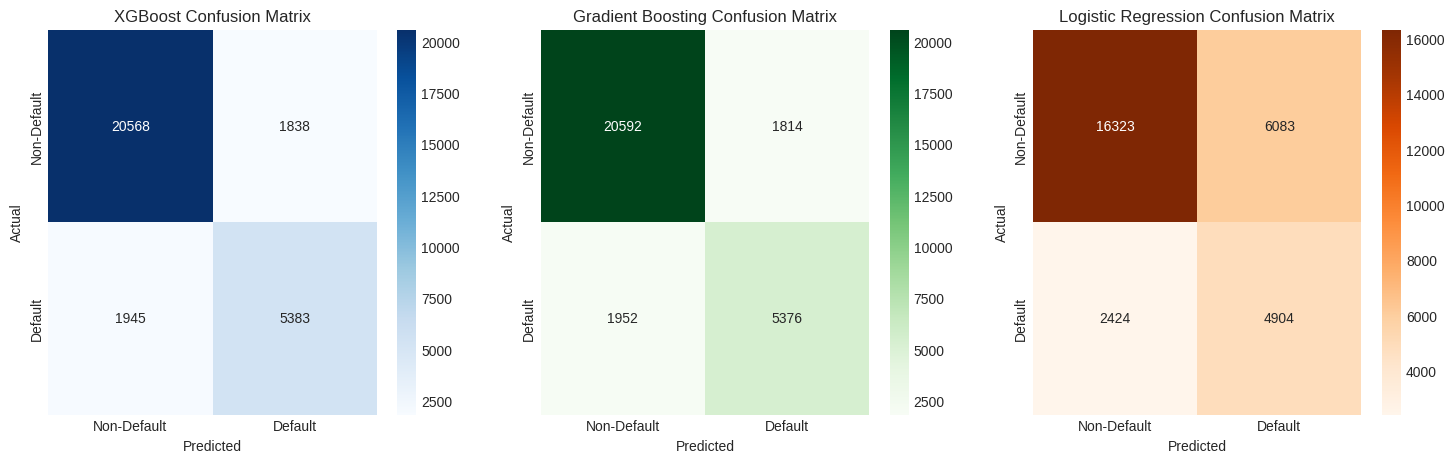

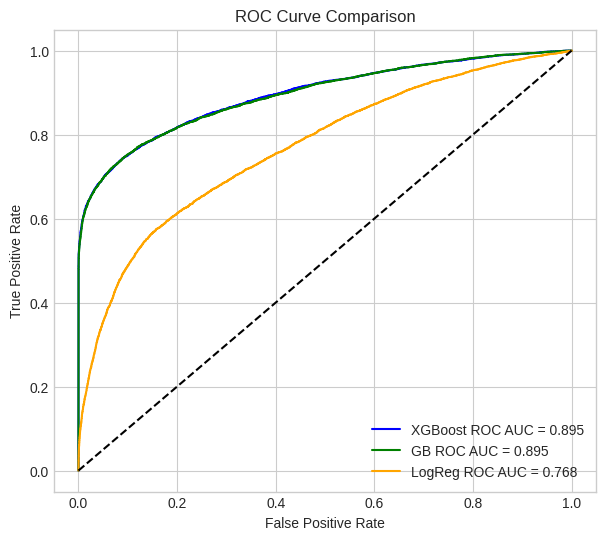

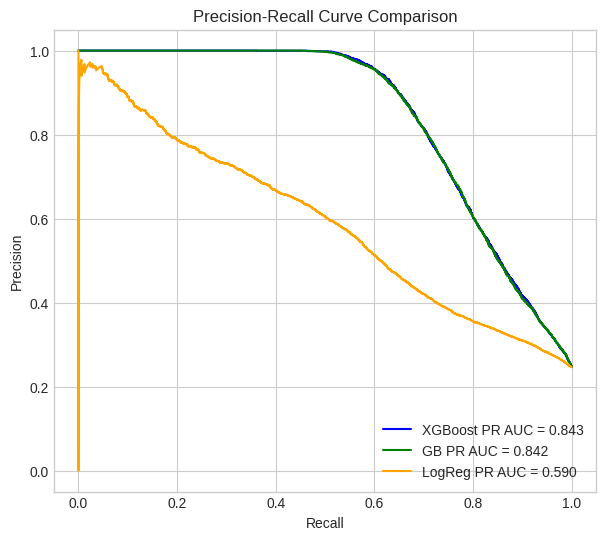

In [37]:
def plot_three_models(y_true, y_pred_xgb, y_proba_xgb, 
                      y_pred_gb, y_proba_gb, 
                      y_pred_log, y_proba_log):
    
    # ---------- Confusion Matrices ----------
    fig, axes = plt.subplots(1,3, figsize=(18,5))
    
    sns.heatmap(confusion_matrix(y_true, y_pred_xgb), annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Default','Default'], yticklabels=['Non-Default','Default'], ax=axes[0])
    axes[0].set_title('XGBoost Confusion Matrix'); axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

    sns.heatmap(confusion_matrix(y_true, y_pred_gb), annot=True, fmt='d', cmap='Greens',
                xticklabels=['Non-Default','Default'], yticklabels=['Non-Default','Default'], ax=axes[1])
    axes[1].set_title('Gradient Boosting Confusion Matrix'); axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')

    sns.heatmap(confusion_matrix(y_true, y_pred_log), annot=True, fmt='d', cmap='Oranges',
                xticklabels=['Non-Default','Default'], yticklabels=['Non-Default','Default'], ax=axes[2])
    axes[2].set_title('Logistic Regression Confusion Matrix'); axes[2].set_xlabel('Predicted'); axes[2].set_ylabel('Actual')
    
    plt.show()

    # ---------- ROC Curves ----------
    fpr_xgb, tpr_xgb, _ = roc_curve(y_true, y_proba_xgb)
    fpr_gb, tpr_gb, _ = roc_curve(y_true, y_proba_gb)
    fpr_log, tpr_log, _ = roc_curve(y_true, y_proba_log)
    
    plt.figure(figsize=(7,6))
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC AUC = {auc(fpr_xgb, tpr_xgb):.3f}', color='blue')
    plt.plot(fpr_gb, tpr_gb, label=f'GB ROC AUC = {auc(fpr_gb, tpr_gb):.3f}', color='green')
    plt.plot(fpr_log, tpr_log, label=f'LogReg ROC AUC = {auc(fpr_log, tpr_log):.3f}', color='orange')
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curve Comparison')
    plt.legend(); plt.show()

    # ---------- Precision-Recall Curves ----------
    precision_xgb, recall_xgb, _ = precision_recall_curve(y_true, y_proba_xgb)
    precision_gb, recall_gb, _ = precision_recall_curve(y_true, y_proba_gb)
    precision_log, recall_log, _ = precision_recall_curve(y_true, y_proba_log)
    
    plt.figure(figsize=(7,6))
    plt.plot(recall_xgb, precision_xgb, label=f'XGBoost PR AUC = {average_precision_score(y_true, y_proba_xgb):.3f}', color='blue')
    plt.plot(recall_gb, precision_gb, label=f'GB PR AUC = {average_precision_score(y_true, y_proba_gb):.3f}', color='green')
    plt.plot(recall_log, precision_log, label=f'LogReg PR AUC = {average_precision_score(y_true, y_proba_log):.3f}', color='orange')
    plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve Comparison')
    plt.legend(); plt.show()


# ==========================
# Run the comparison
# ==========================
plot_three_models(
    y_test, 
    y_pred, y_pred_proba,           # XGBoost
    y_pred_gb, y_pred_proba_gb,     # Gradient Boosting
    y_pred_log, y_pred_proba_log     # Logistic Regression
)